### Machine Learning - House Prices - FINAL BRAIN CELL

#### Libraries Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from scipy import stats
plt.style.use('ggplot')

#### Read data

In [2]:
house_prices = pd.read_csv('train.csv',sep=",")
interested_series = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']
replacement_dict = {np.nan:'NotAvailable'}
for interest in interested_series:
    house_prices[interest] = house_prices[interest].replace(replacement_dict)

## Data Understanding

In [3]:
house_prices

Id  MSSubClass MSZoning  LotFrontage  LotArea Street         Alley  \
0        1          60       RL         65.0     8450   Pave  NotAvailable   
1        2          20       RL         80.0     9600   Pave  NotAvailable   
2        3          60       RL         68.0    11250   Pave  NotAvailable   
3        4          70       RL         60.0     9550   Pave  NotAvailable   
4        5          60       RL         84.0    14260   Pave  NotAvailable   
...    ...         ...      ...          ...      ...    ...           ...   
1455  1456          60       RL         62.0     7917   Pave  NotAvailable   
1456  1457          20       RL         85.0    13175   Pave  NotAvailable   
1457  1458          70       RL         66.0     9042   Pave  NotAvailable   
1458  1459          20       RL         68.0     9717   Pave  NotAvailable   
1459  1460          20       RL         75.0     9937   Pave  NotAvailable   

     LotShape LandContour Utilities  ... PoolArea        PoolQC         Fence  \
0         Reg         Lvl    AllPub  ...        0  NotAvailable  NotAvailable   
1         Reg         Lvl    AllPub  ...        0  NotAvailable  NotAvailable   
2         IR1         Lvl    AllPub  ...        0  NotAvailable  NotAvailable   
3         IR1         Lvl    AllPub  ...        0  NotAvailable  NotAvailable   
4         IR1         Lvl    AllPub  ...        0  NotAvailable  NotAvailable   
...       ...         ...       ...  ...      ...           ...           ...   
1455      Reg         Lvl    AllPub  ...        0  NotAvailable  NotAvailable   
1456      Reg         Lvl    AllPub  ...        0  NotAvailable         MnPrv   
1457      Reg         Lvl    AllPub  ...        0  NotAvailable         GdPrv   
1458      Reg         Lvl    AllPub  ...        0  NotAvailable  NotAvailable   
1459      Reg         Lvl    AllPub  ...        0  NotAvailable  NotAvailable   

       MiscFeature MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
0     NotAvailable       0      2   2008        WD         Normal     208500  
1     NotAvailable       0      5   2007        WD         Normal     181500  
2     NotAvailable       0      9   2008        WD         Normal     223500  
3     NotAvailable       0      2   2006        WD        Abnorml     140000  
4     NotAvailable       0     12   2008        WD         Normal     250000  
...            ...     ...    ...    ...       ...            ...        ...  
1455  NotAvailable       0      8   2007        WD         Normal     175000  
1456  NotAvailable       0      2   2010        WD         Normal     210000  
1457          Shed    2500      5   2010        WD         Normal     266500  
1458  NotAvailable       0      4   2010        WD         Normal     142125  
1459  NotAvailable       0      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

#### Top 10 records

In [4]:
house_prices.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street         Alley  \
0   1          60       RL         65.0     8450   Pave  NotAvailable   
1   2          20       RL         80.0     9600   Pave  NotAvailable   
2   3          60       RL         68.0    11250   Pave  NotAvailable   
3   4          70       RL         60.0     9550   Pave  NotAvailable   
4   5          60       RL         84.0    14260   Pave  NotAvailable   
5   6          50       RL         85.0    14115   Pave  NotAvailable   
6   7          20       RL         75.0    10084   Pave  NotAvailable   
7   8          60       RL          NaN    10382   Pave  NotAvailable   
8   9          50       RM         51.0     6120   Pave  NotAvailable   
9  10         190       RL         50.0     7420   Pave  NotAvailable   

  LotShape LandContour Utilities  ... PoolArea        PoolQC         Fence  \
0      Reg         Lvl    AllPub  ...        0  NotAvailable  NotAvailable   
1      Reg         Lvl    AllPub  ...        0  NotAvailable  NotAvailable   
2      IR1         Lvl    AllPub  ...        0  NotAvailable  NotAvailable   
3      IR1         Lvl    AllPub  ...        0  NotAvailable  NotAvailable   
4      IR1         Lvl    AllPub  ...        0  NotAvailable  NotAvailable   
5      IR1         Lvl    AllPub  ...        0  NotAvailable         MnPrv   
6      Reg         Lvl    AllPub  ...        0  NotAvailable  NotAvailable   
7      IR1         Lvl    AllPub  ...        0  NotAvailable  NotAvailable   
8      Reg         Lvl    AllPub  ...        0  NotAvailable  NotAvailable   
9      Reg         Lvl    AllPub  ...        0  NotAvailable  NotAvailable   

    MiscFeature MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
0  NotAvailable       0      2   2008        WD         Normal     208500  
1  NotAvailable       0      5   2007        WD         Normal     181500  
2  NotAvailable       0      9   2008        WD         Normal     223500  
3  NotAvailable       0      2   2006        WD        Abnorml     140000  
4  NotAvailable       0     12   2008        WD         Normal     250000  
5          Shed     700     10   2009        WD         Normal     143000  
6  NotAvailable       0      8   2007        WD         Normal     307000  
7          Shed     350     11   2009        WD         Normal     200000  
8  NotAvailable       0      4   2008        WD        Abnorml     129900  
9  NotAvailable       0      1   2008        WD         Normal     118000  

[10 rows x 81 columns]

#### Last 10 records

In [5]:
house_prices.tail(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street         Alley  \
1450  1451          90       RL         60.0     9000   Pave  NotAvailable   
1451  1452          20       RL         78.0     9262   Pave  NotAvailable   
1452  1453         180       RM         35.0     3675   Pave  NotAvailable   
1453  1454          20       RL         90.0    17217   Pave  NotAvailable   
1454  1455          20       FV         62.0     7500   Pave          Pave   
1455  1456          60       RL         62.0     7917   Pave  NotAvailable   
1456  1457          20       RL         85.0    13175   Pave  NotAvailable   
1457  1458          70       RL         66.0     9042   Pave  NotAvailable   
1458  1459          20       RL         68.0     9717   Pave  NotAvailable   
1459  1460          20       RL         75.0     9937   Pave  NotAvailable   

     LotShape LandContour Utilities  ... PoolArea        PoolQC         Fence  \
1450      Reg         Lvl    AllPub  ...        0  NotAvailable  NotAvailable   
1451      Reg         Lvl    AllPub  ...        0  NotAvailable  NotAvailable   
1452      Reg         Lvl    AllPub  ...        0  NotAvailable  NotAvailable   
1453      Reg         Lvl    AllPub  ...        0  NotAvailable  NotAvailable   
1454      Reg         Lvl    AllPub  ...        0  NotAvailable  NotAvailable   
1455      Reg         Lvl    AllPub  ...        0  NotAvailable  NotAvailable   
1456      Reg         Lvl    AllPub  ...        0  NotAvailable         MnPrv   
1457      Reg         Lvl    AllPub  ...        0  NotAvailable         GdPrv   
1458      Reg         Lvl    AllPub  ...        0  NotAvailable  NotAvailable   
1459      Reg         Lvl    AllPub  ...        0  NotAvailable  NotAvailable   

       MiscFeature MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
1450  NotAvailable       0      9   2009        WD         Normal     136000  
1451  NotAvailable       0      5   2009       New        Partial     287090  
1452  NotAvailable       0      5   2006        WD         Normal     145000  
1453  NotAvailable       0      7   2006        WD        Abnorml      84500  
1454  NotAvailable       0     10   2009        WD         Normal     185000  
1455  NotAvailable       0      8   2007        WD         Normal     175000  
1456  NotAvailable       0      2   2010        WD         Normal     210000  
1457          Shed    2500      5   2010        WD         Normal     266500  
1458  NotAvailable       0      4   2010        WD         Normal     142125  
1459  NotAvailable       0      6   2008        WD         Normal     147500  

[10 rows x 81 columns]

#### Data dimension (n_rows x n_columns)

In [6]:
house_prices.shape

(1460, 81)

#### How many elements?

In [7]:
house_prices.size

118260

#### Attributes

In [8]:
house_prices.columns.tolist()

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

#### Get attributes type

In [9]:
house_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Convert wrong attribute types


In [10]:
#Get all categorical attributes
categorical_attributes = []
for attribute in house_prices.columns:
    if house_prices[attribute].dtype == object:
        house_prices[attribute] = house_prices[attribute].astype('category')
        categorical_attributes.append(house_prices[attribute].name)
        
to_convert = ['MSSubClass','OverallQual','OverallCond']
for to in to_convert:
    categorical_attributes.append(to)
    house_prices[to] = house_prices[to].astype('category')

In [11]:
house_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   category
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   Alley          1460 non-null   category
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual    1460 non-null   ca

#### Are there any null values?

In [12]:
missing_values_count = house_prices.isna().sum()
columns_with_missing_values = missing_values_count[missing_values_count > 0]
columns_with_missing_values

LotFrontage    259
MasVnrType       8
MasVnrArea       8
Electrical       1
GarageYrBlt     81
dtype: int64

#### Are there duplicate values?

In [13]:
duplicate_rows = house_prices[house_prices.duplicated()]
duplicate_rows

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]

#### Get general statistics

In [14]:
house_prices.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
TotRmsAbvGrd        6.0       7.00      14.0  
Fireplaces          1.0       1.00       3.0  
GarageYrBlt      1980.0    2002.00    2010.0  
GarageCars          2.0       2.00       4.0  
GarageArea        480.0     576.00    1418.0  
WoodDeckSF          0.0     168.00     857.0  
OpenPorchSF        25.0      68.00     547.0  
EnclosedPorch       0.0       0.00 

In [15]:
house_prices.describe(include='category').T

count unique           top  freq
MSSubClass     1460     15            20   536
MSZoning       1460      5            RL  1151
Street         1460      2          Pave  1454
Alley          1460      3  NotAvailable  1369
LotShape       1460      4           Reg   925
LandContour    1460      4           Lvl  1311
Utilities      1460      2        AllPub  1459
LotConfig      1460      5        Inside  1052
LandSlope      1460      3           Gtl  1382
Neighborhood   1460     25         NAmes   225
Condition1     1460      9          Norm  1260
Condition2     1460      8          Norm  1445
BldgType       1460      5          1Fam  1220
HouseStyle     1460      8        1Story   726
OverallQual    1460     10             5   397
OverallCond    1460      9             5   821
RoofStyle      1460      6         Gable  1141
RoofMatl       1460      8       CompShg  1434
Exterior1st    1460     15       VinylSd   515
Exterior2nd    1460     16       VinylSd   504
MasVnrType     1452      4          None   864
ExterQual      1460      4            TA   906
ExterCond      1460      5            TA  1282
Foundation     1460      6         PConc   647
BsmtQual       1460      5            TA   649
BsmtCond       1460      5            TA  1311
BsmtExposure   1460      5            No   953
BsmtFinType1   1460      7           Unf   430
BsmtFinType2   1460      7           Unf  1256
Heating        1460      6          GasA  1428
HeatingQC      1460      5            Ex   741
CentralAir     1460      2             Y  1365
Electrical     1459      5         SBrkr  1334
KitchenQual    1460      4            TA   735
Functional     1460      7           Typ  1360
FireplaceQu    1460      6  NotAvailable   690
GarageType     1460      7        Attchd   870
GarageFinish   1460      4           Unf   605
GarageQual     1460      6            TA  1311
GarageCond     1460      6            TA  1326
PavedDrive     1460      3             Y  1340
PoolQC         1460      4  NotAvailable  1453
Fence          1460      5  NotAvailable  1179
MiscFeature    1460      5  NotAvailable  1406
SaleType       1460      9            WD  1267
SaleCondition  1460      6        Normal  1198

#### Building Histograms

#### We do not take into account the missing values that will be filled during the Data Preparation

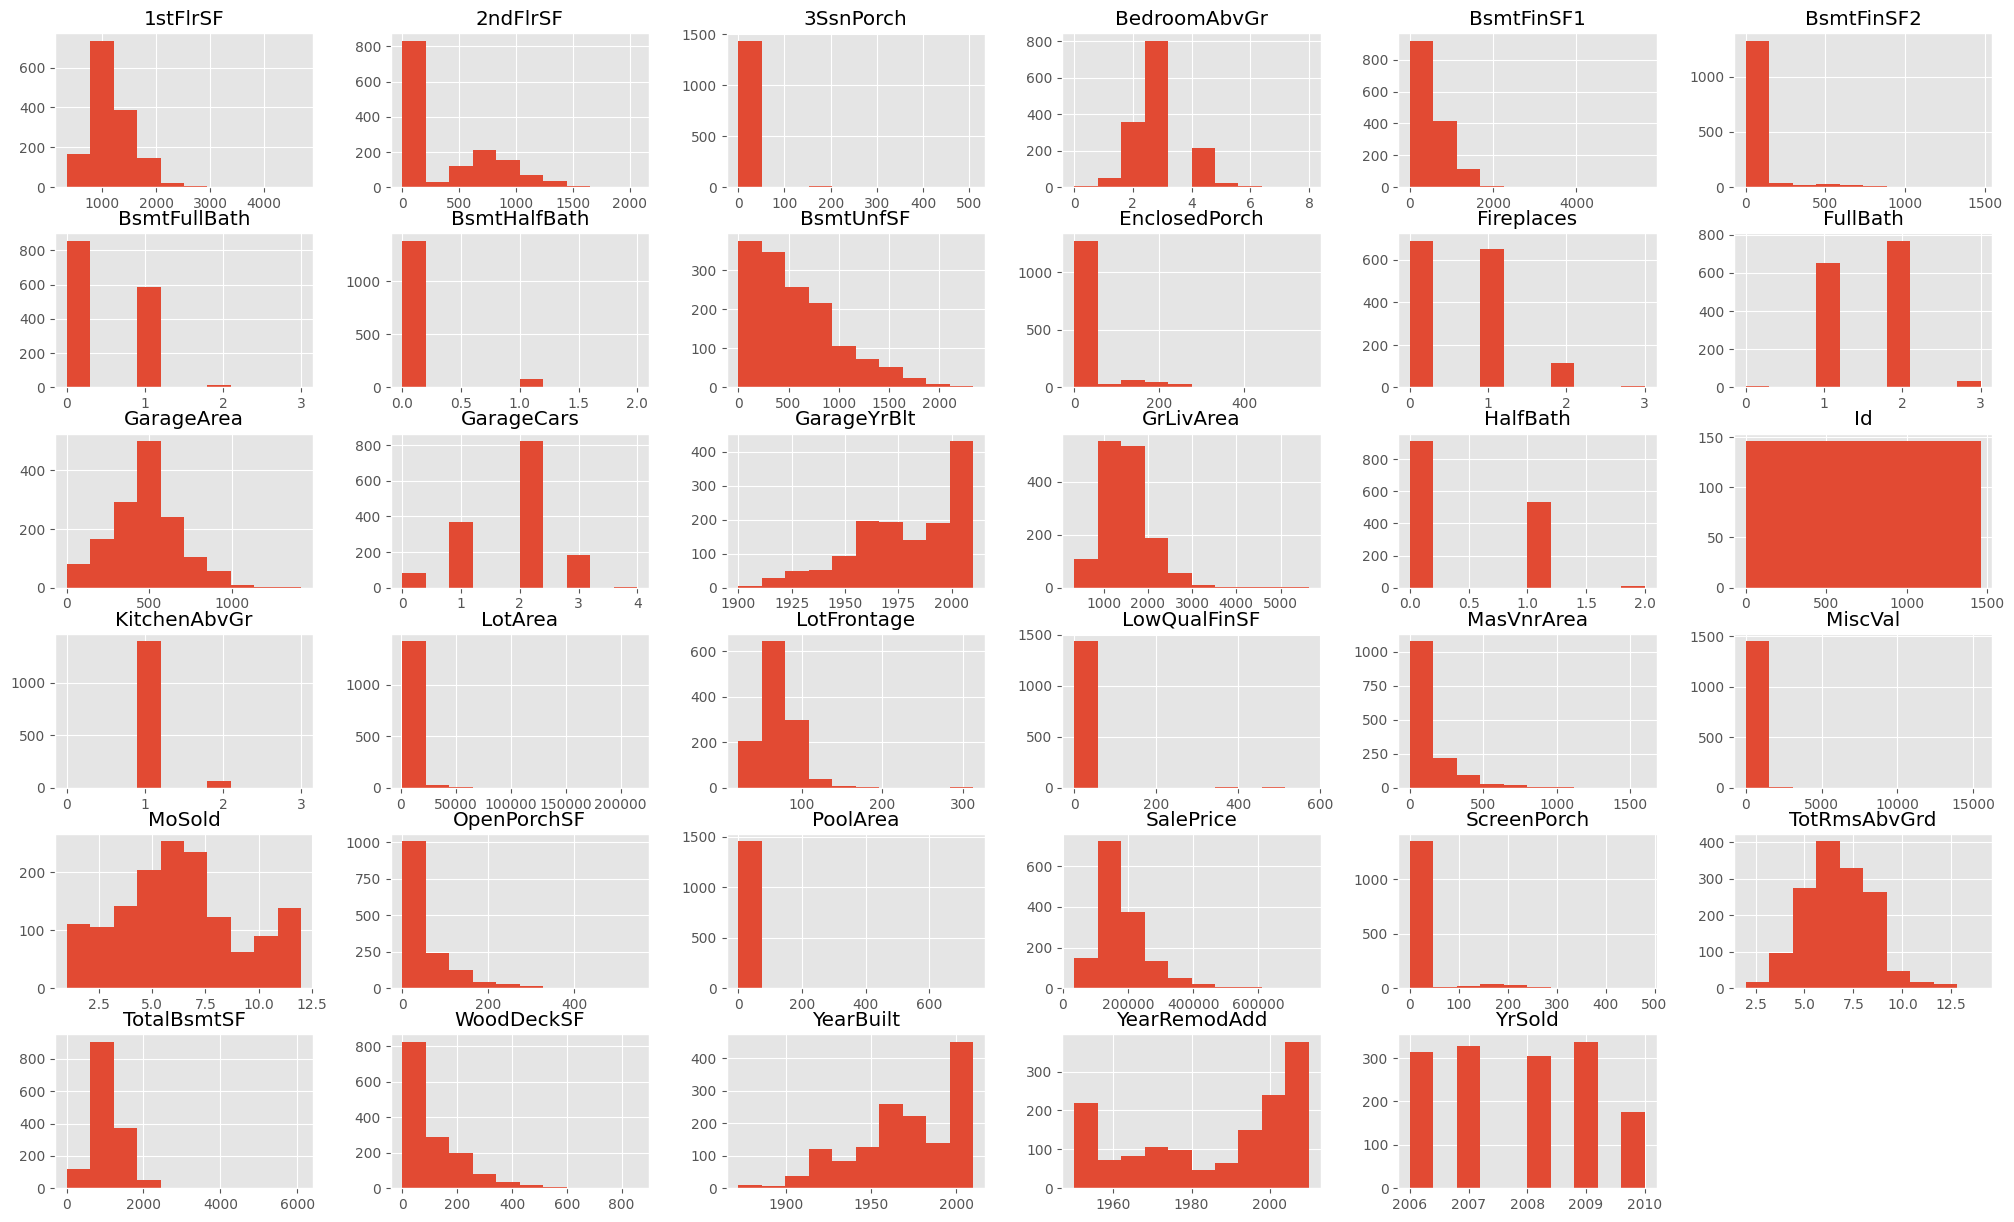

In [16]:
numeric_house_prices = house_prices[house_prices.columns.difference(categorical_attributes)]
numeric_house_prices.hist(figsize=(25,15))
plt.show()

#### Bar plots for categorical attributes

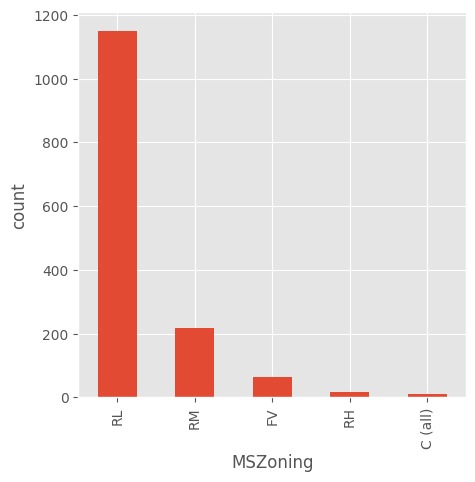

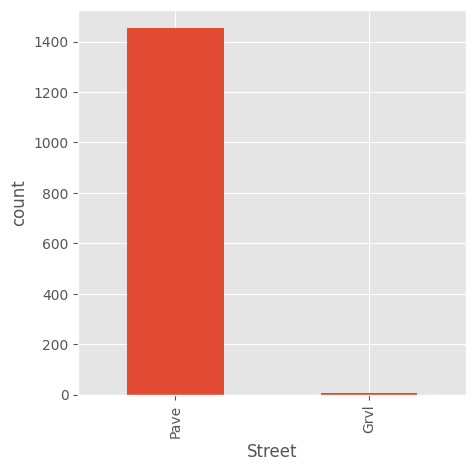

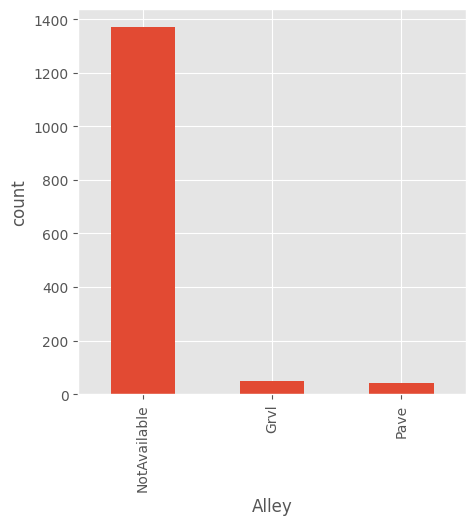

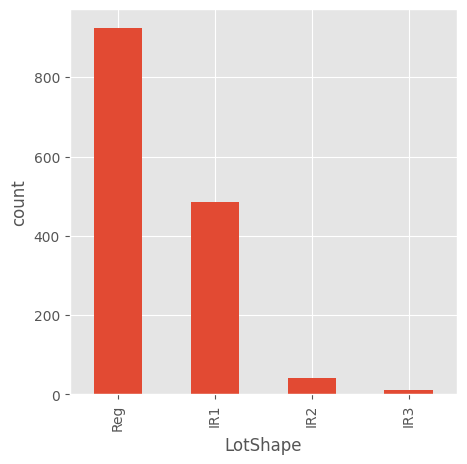

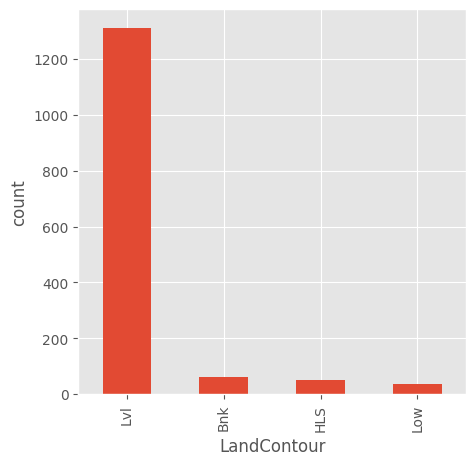

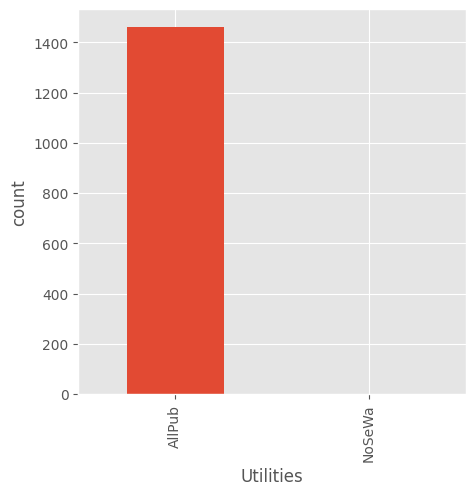

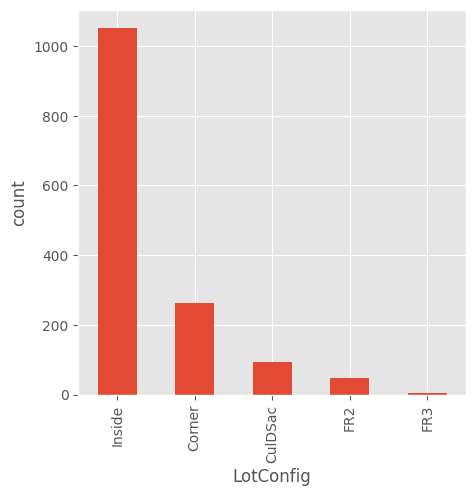

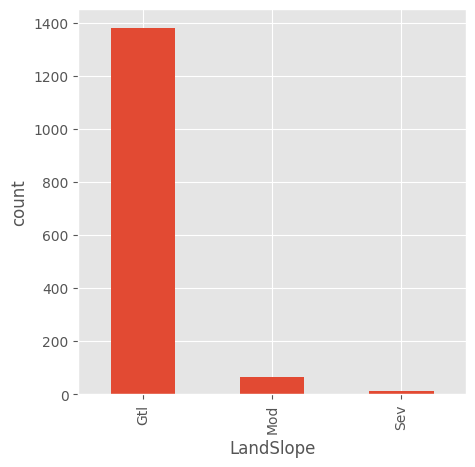

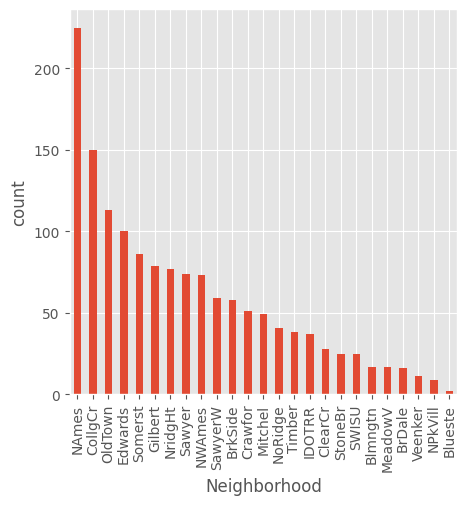

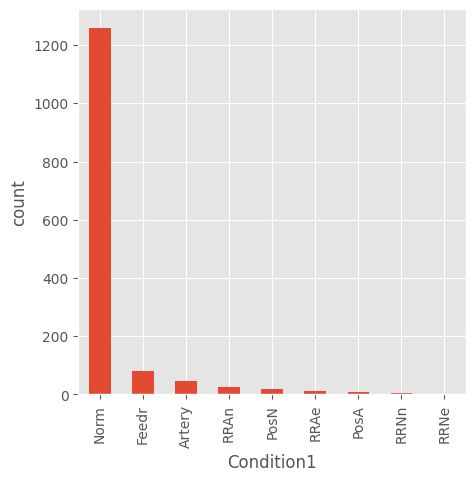

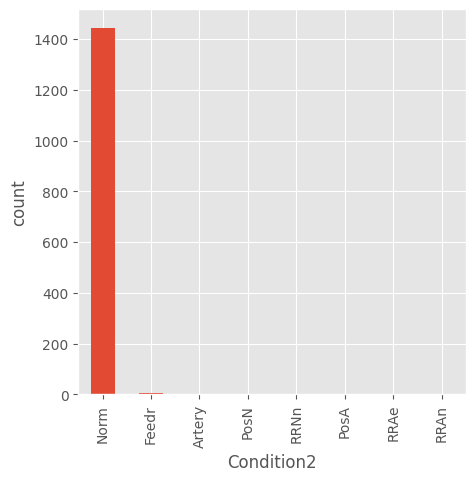

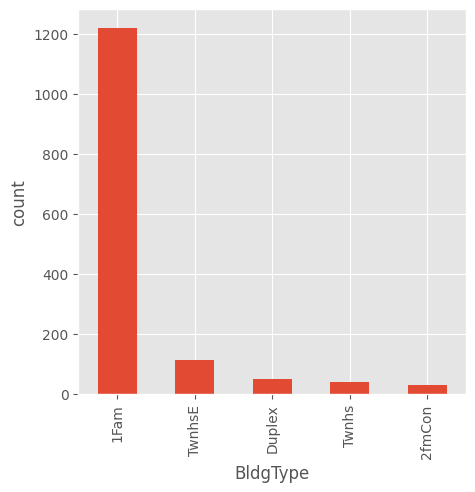

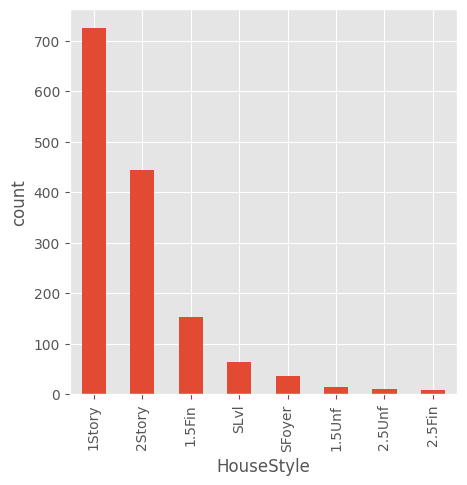

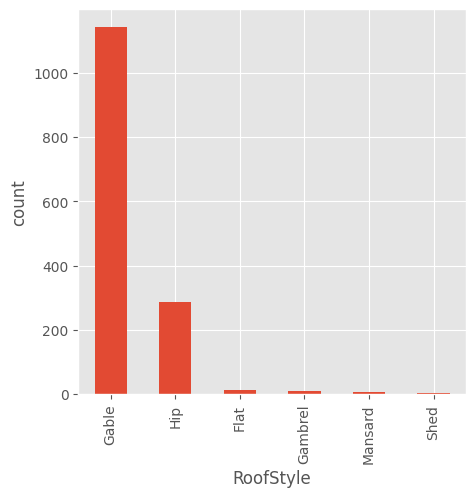

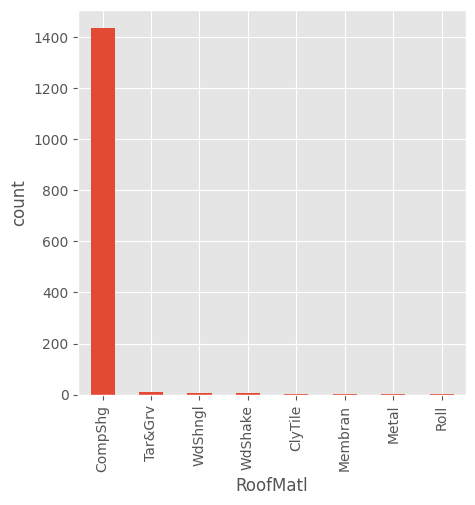

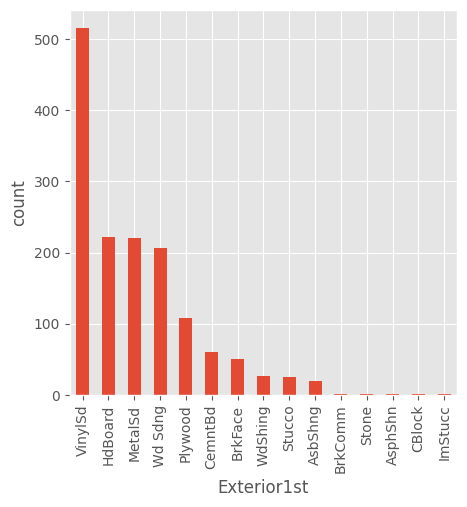

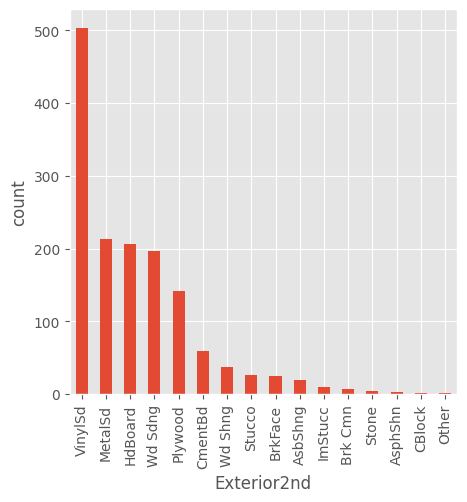

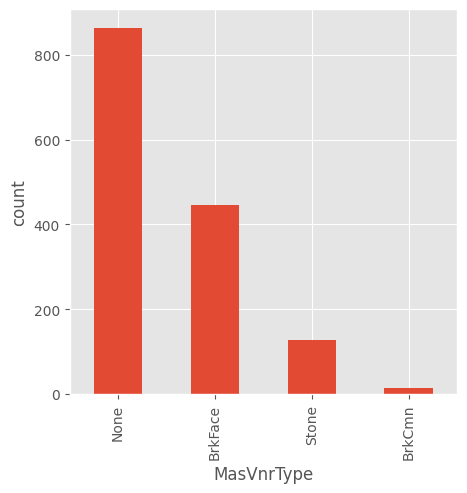

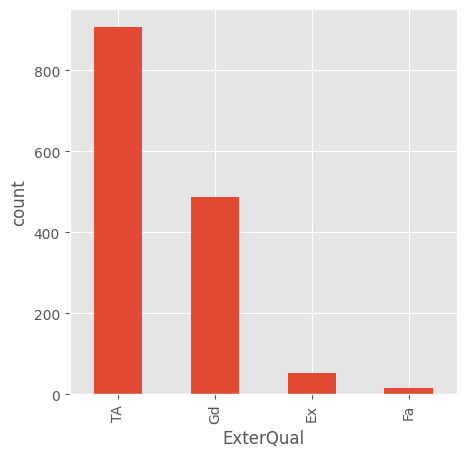

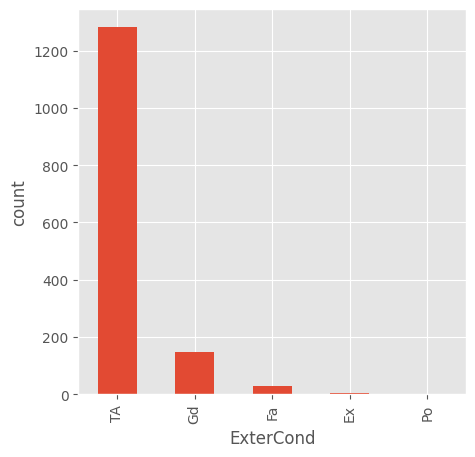

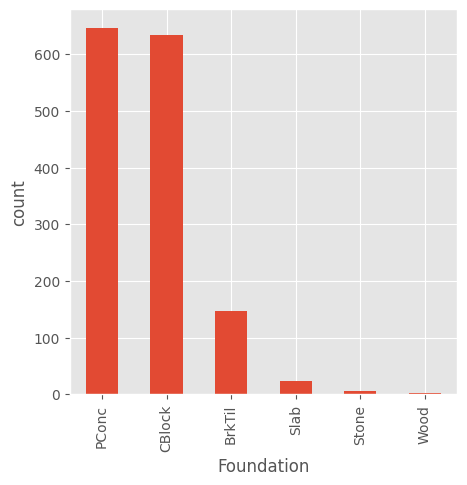

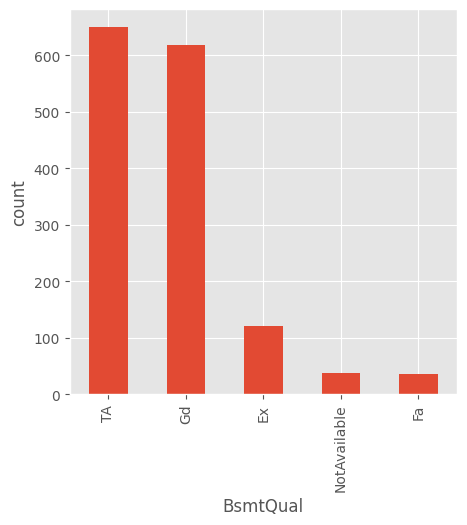

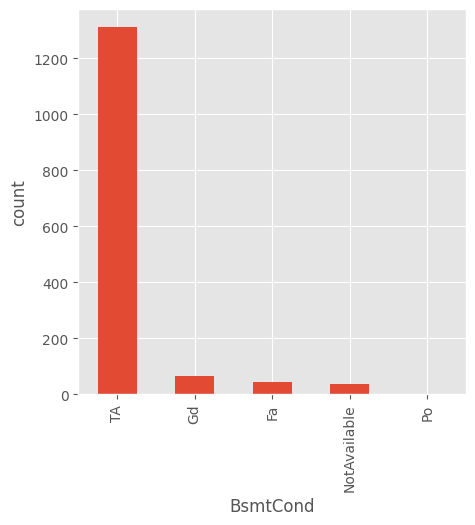

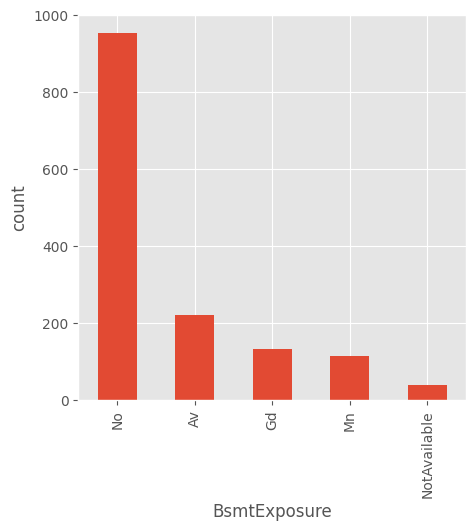

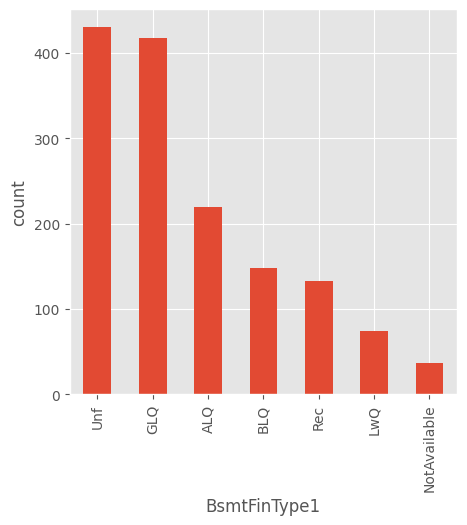

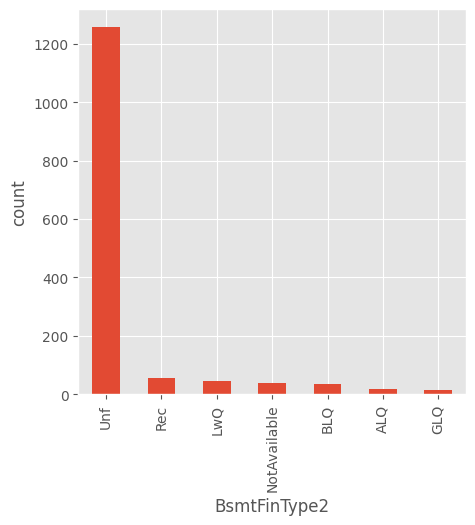

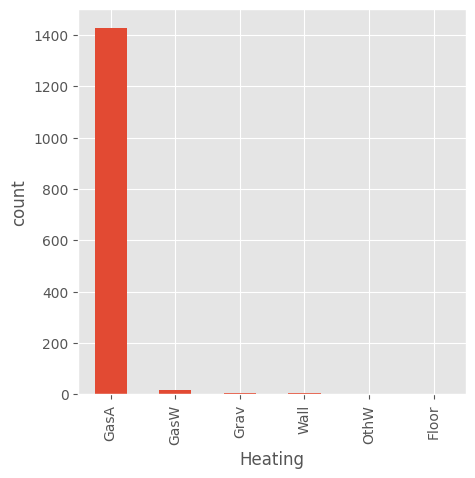

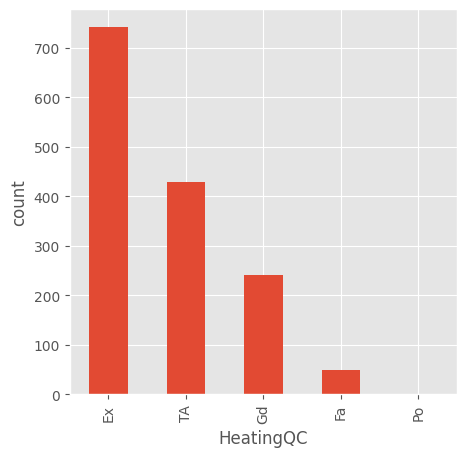

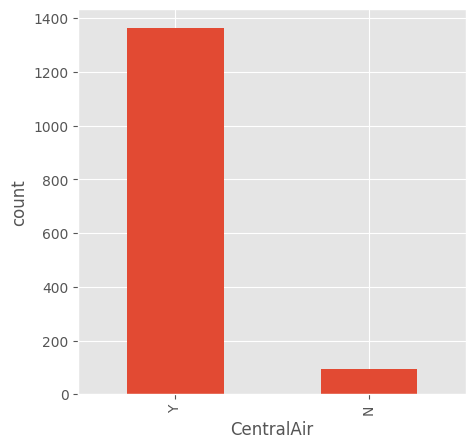

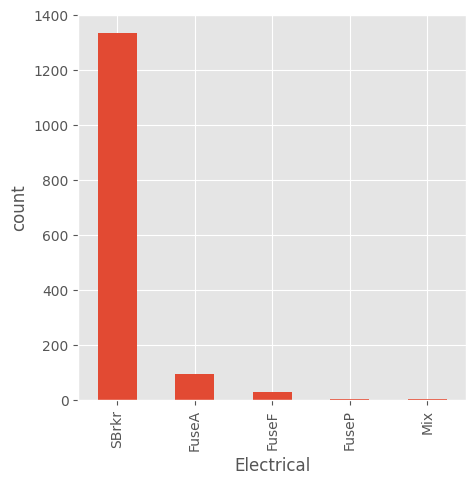

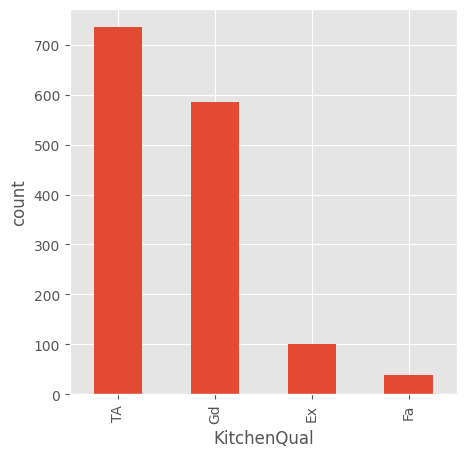

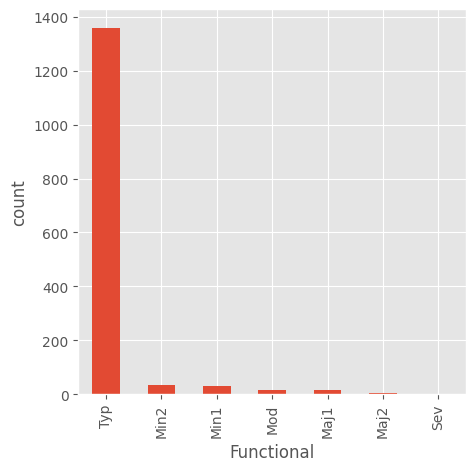

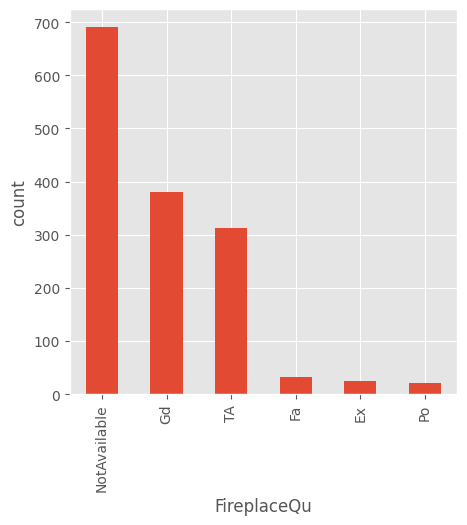

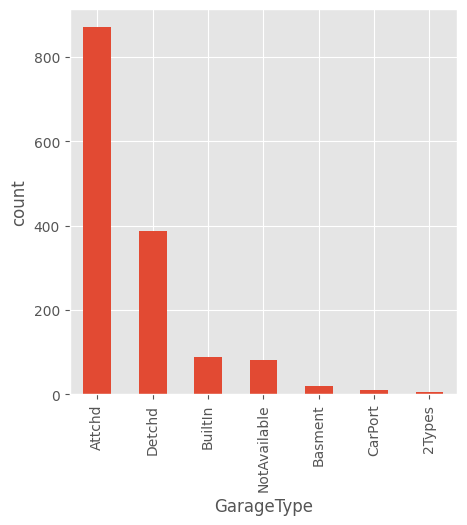

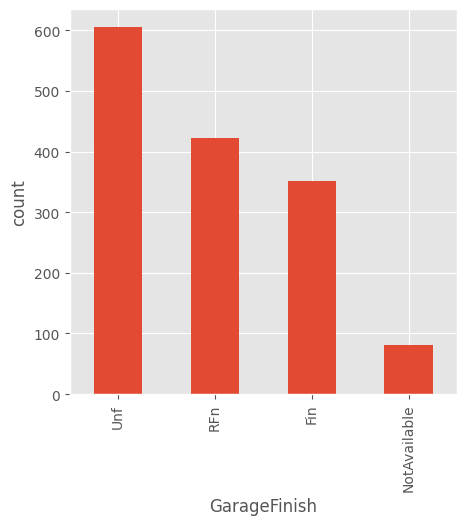

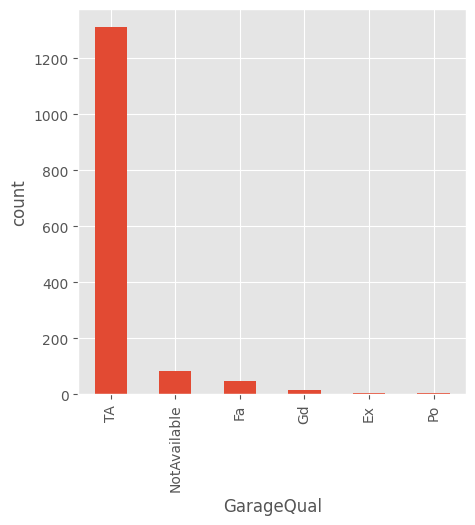

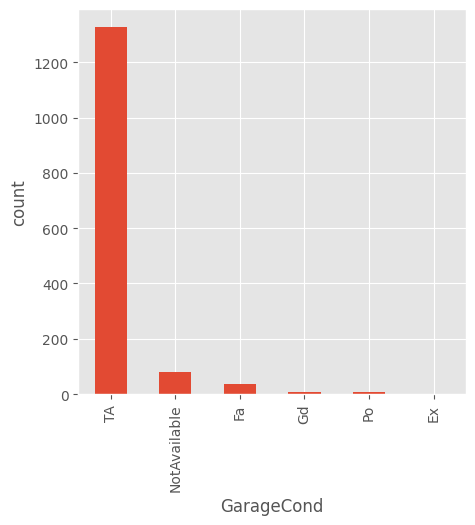

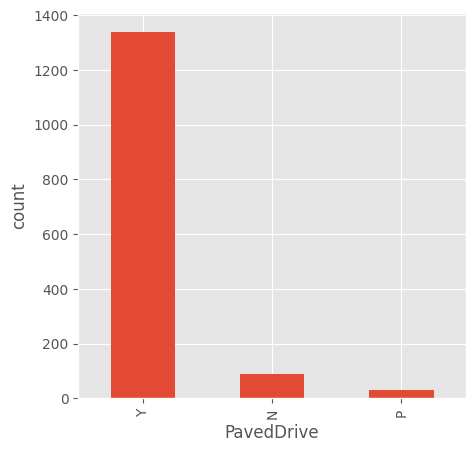

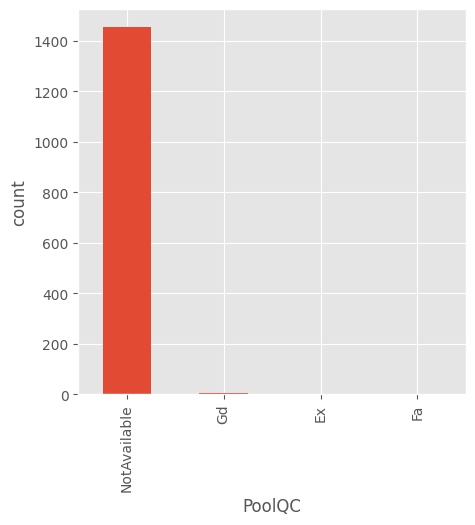

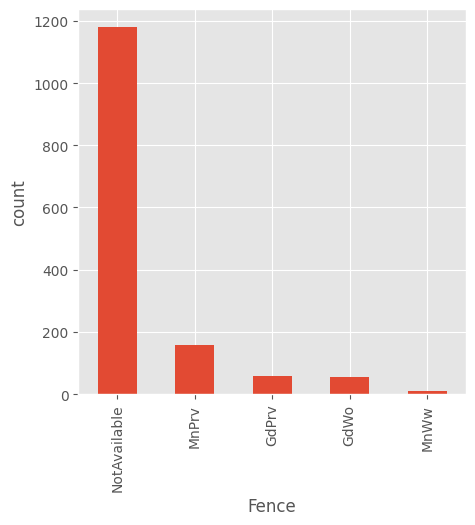

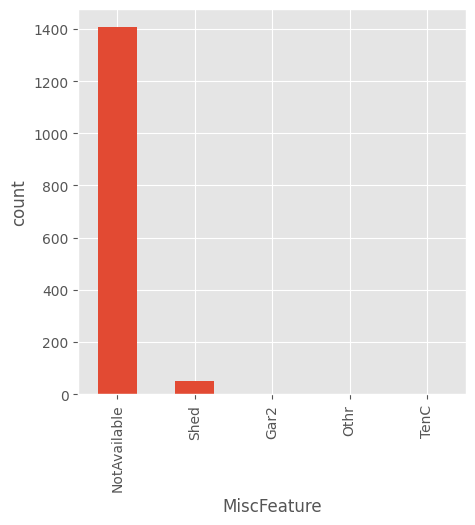

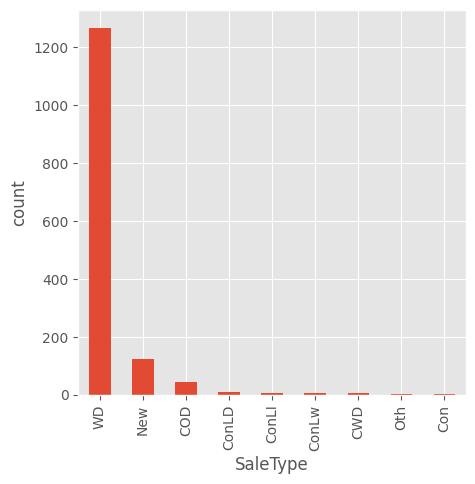

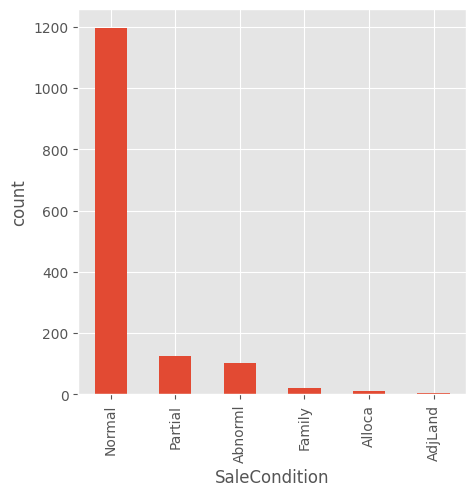

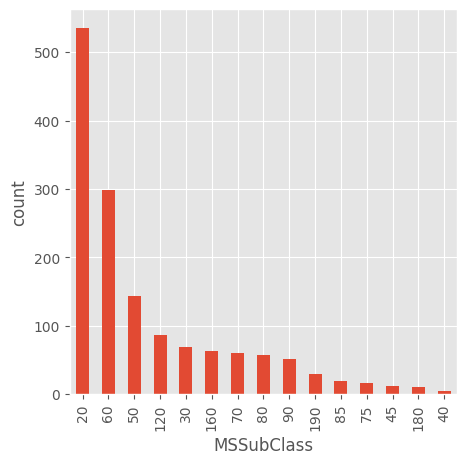

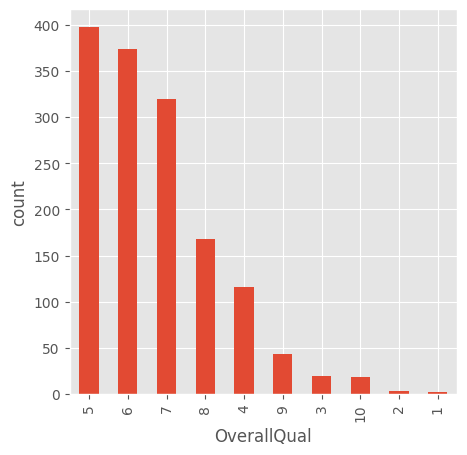

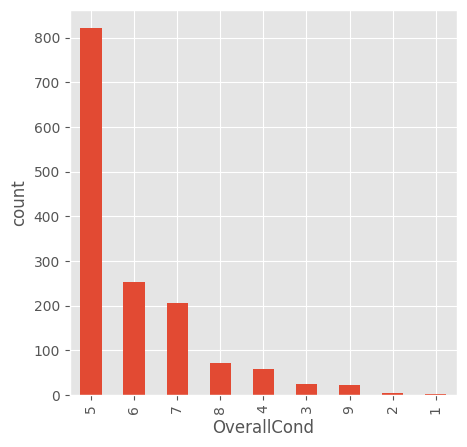

In [17]:
for attribute in categorical_attributes:
   val = house_prices[attribute].value_counts()
   val.plot(kind='bar',figsize=(5,5))
   plt.ylabel('count')
   plt.xlabel(attribute)
   plt.show()

#### Histograms and bar plots according to the class attributes

We discretize the series SalePrice in order to visualize the histogram plots (if we do not perform this operation is very impossible to show the histogram plots due to large variance of the SalePrice's values - **launch the cell above as Code cell**) together with the project specification.

- LOW se SalePrice <= 150.000
- MEDIUM se 150.000 < SalePrice < 300.000
- HIGH se SalePrice >= 300.000

<ipython-input-18-23b2074bab14>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df['discretized_SalePrice'] = pd.cut(numeric_df['SalePrice'], bins,  labels = label)


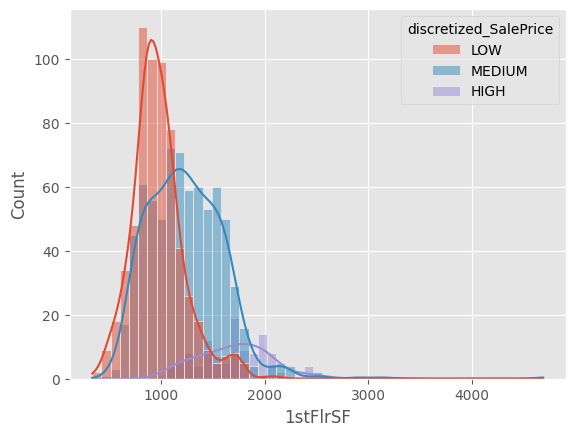

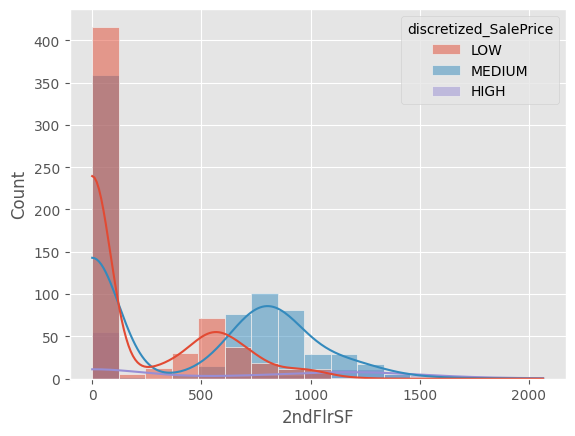

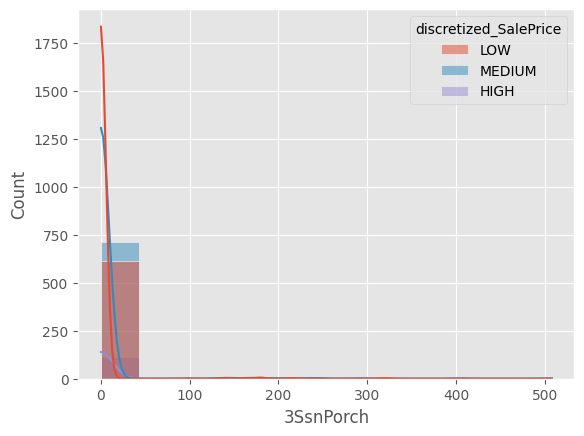

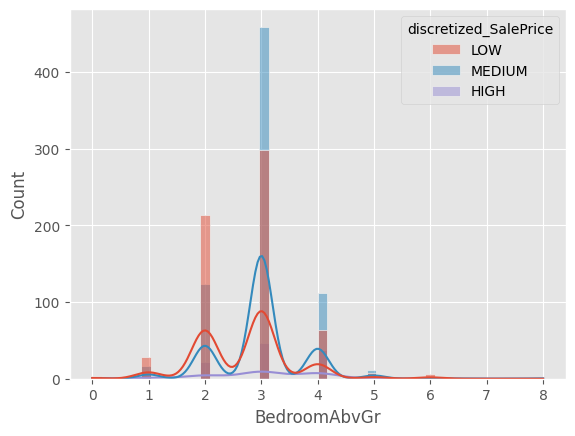

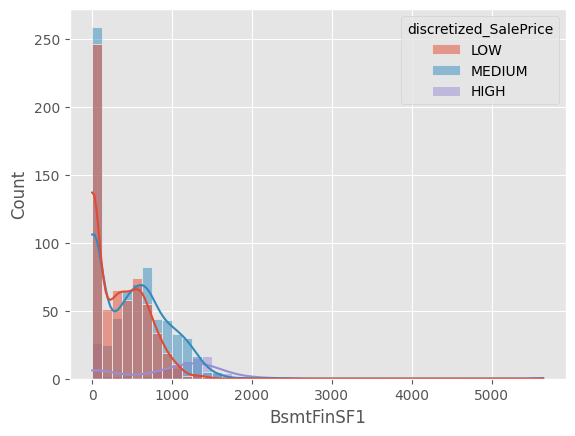

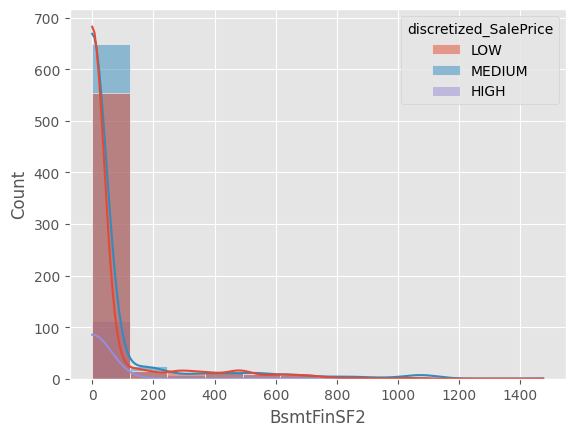

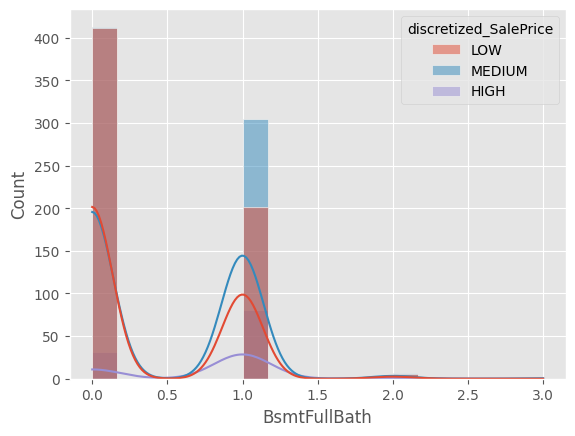

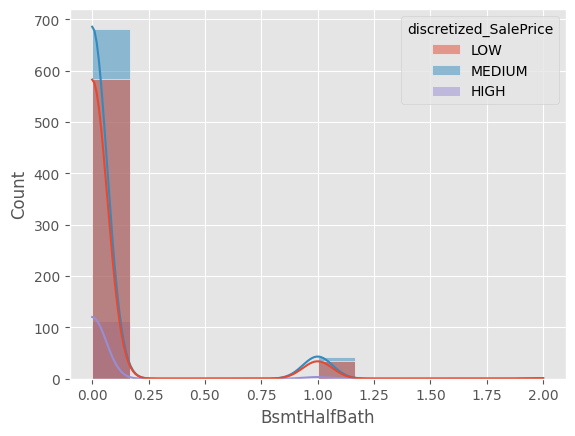

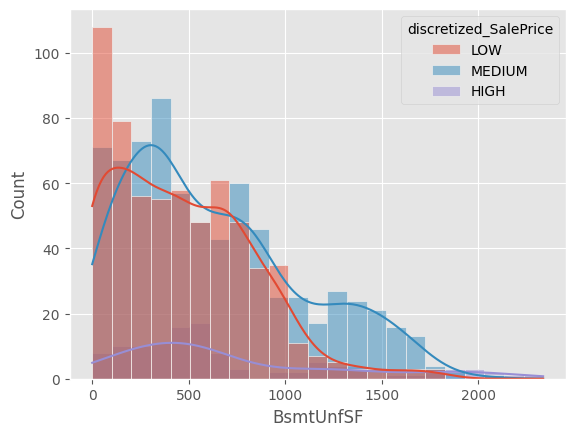

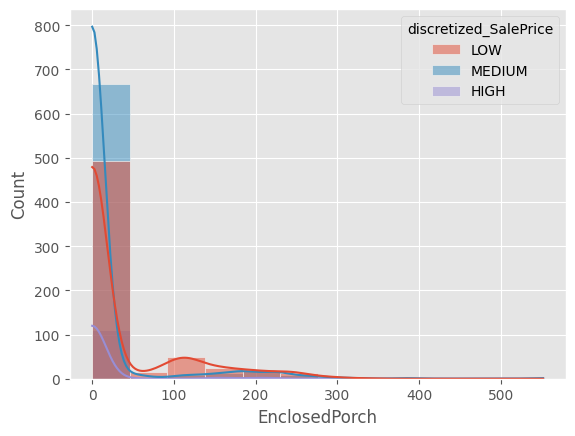

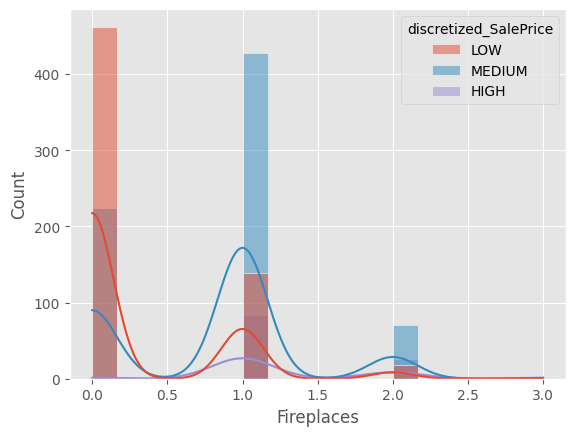

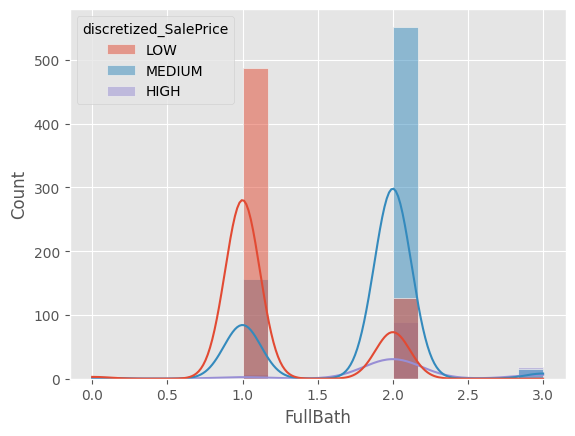

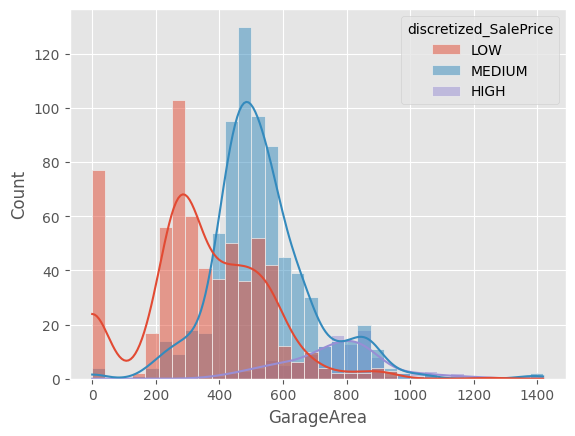

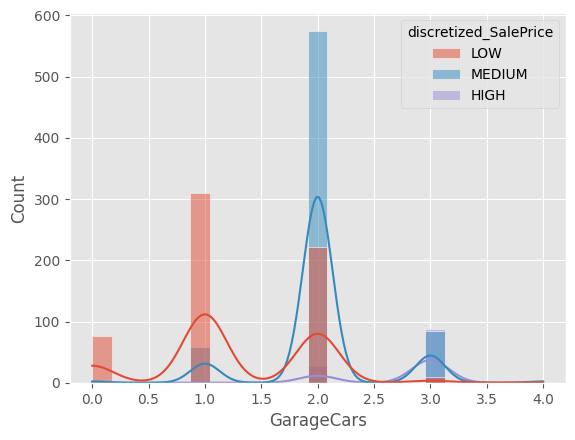

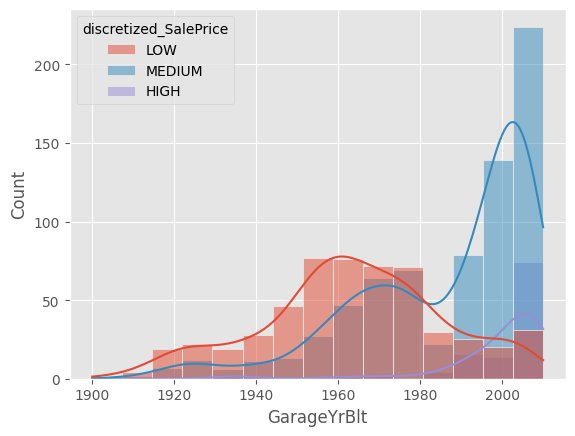

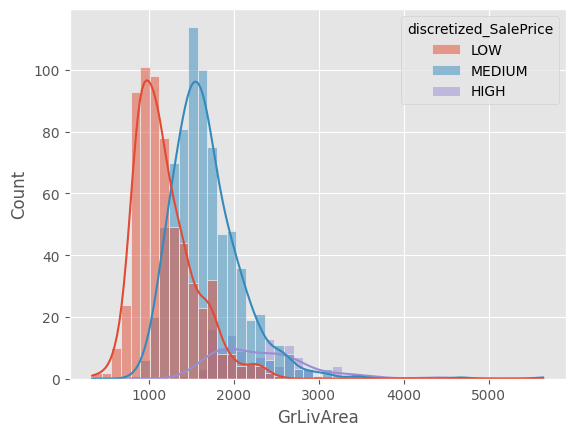

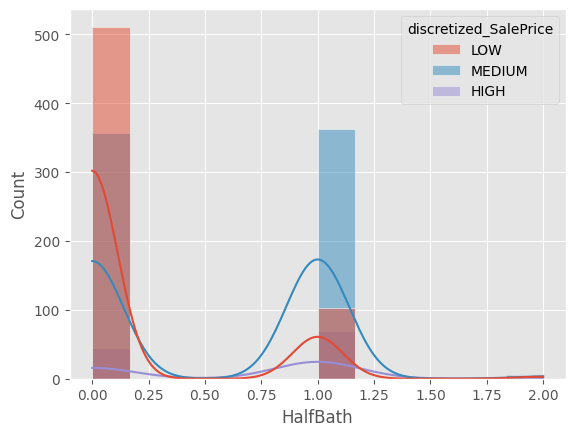

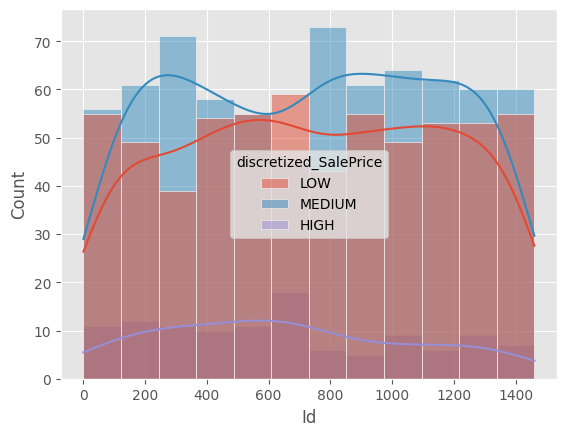

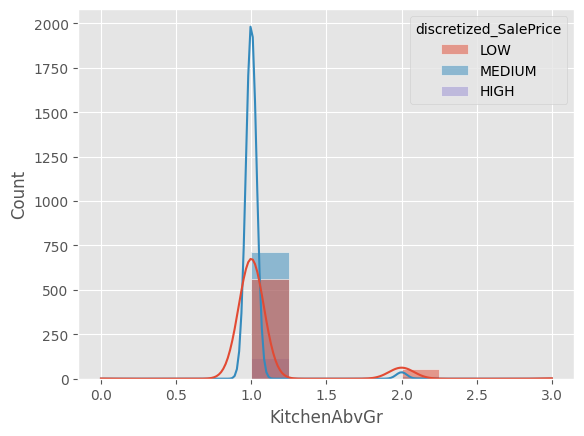

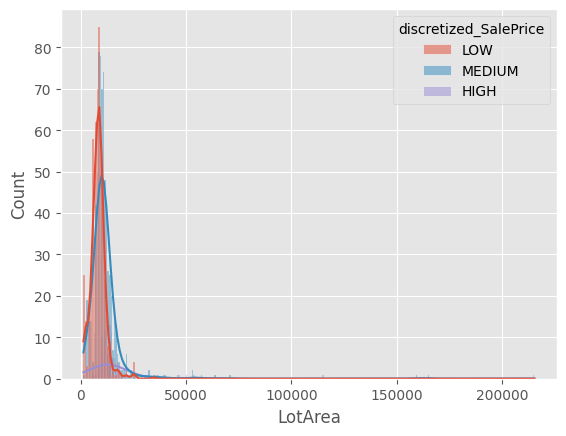

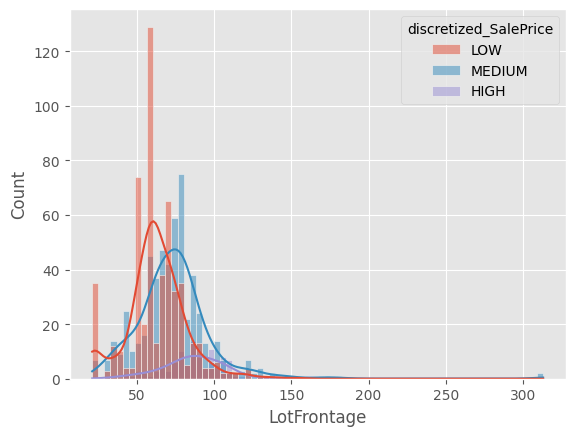

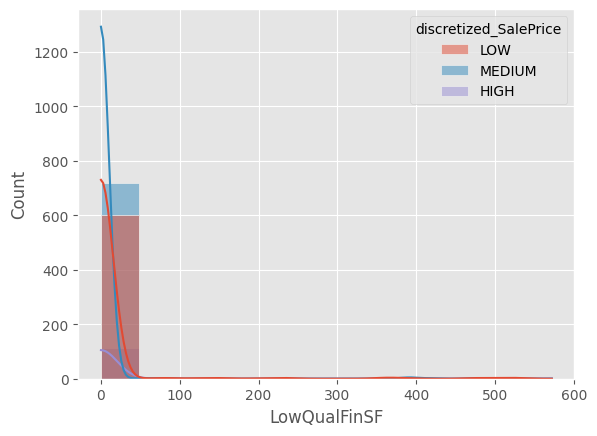

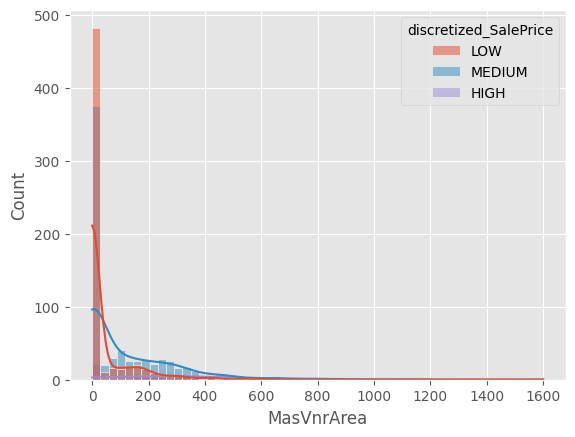

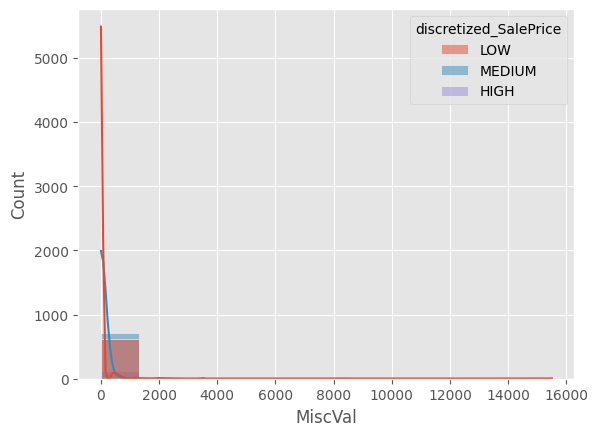

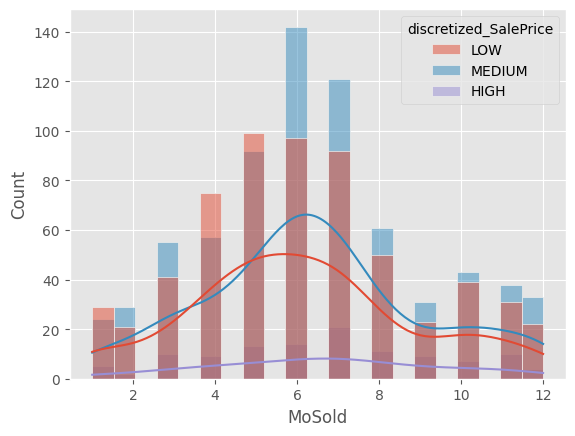

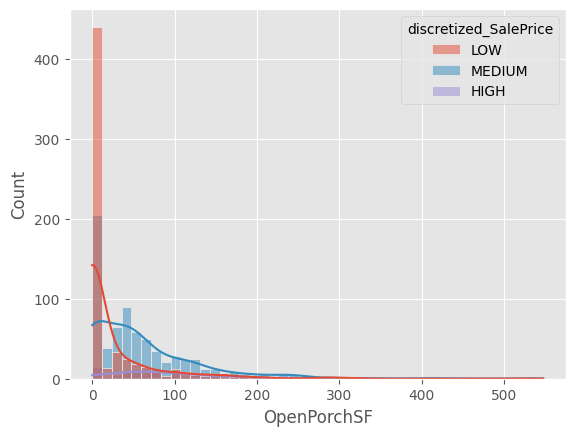

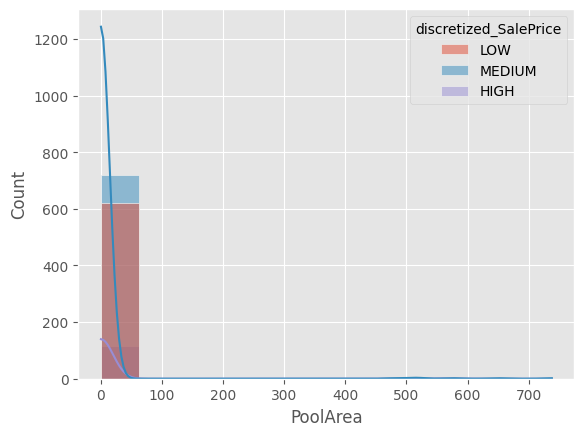

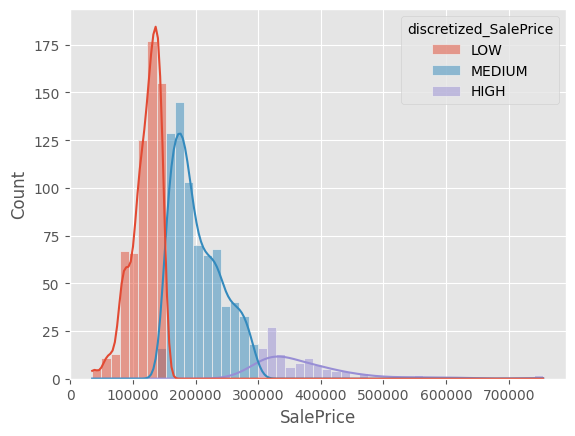

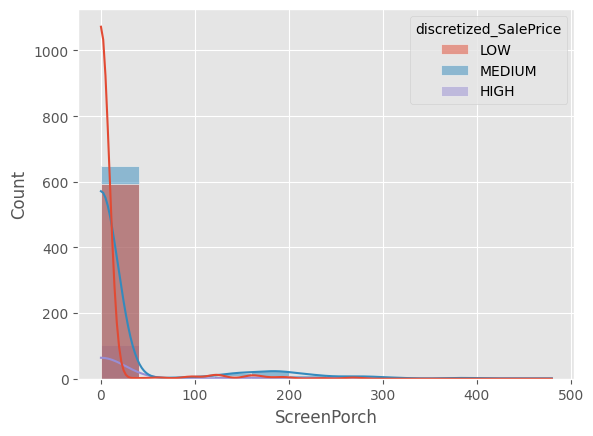

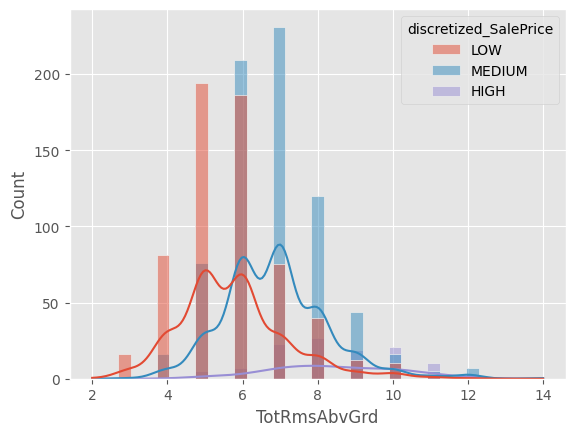

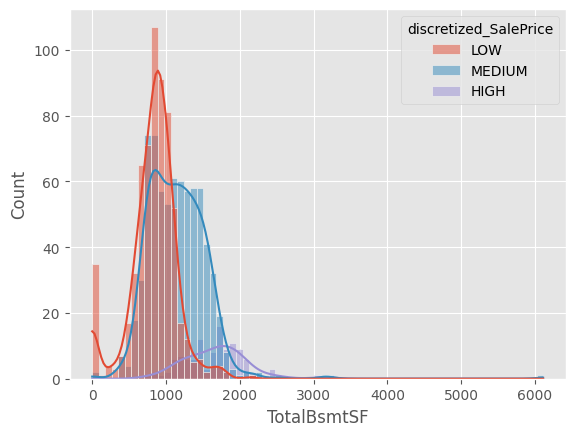

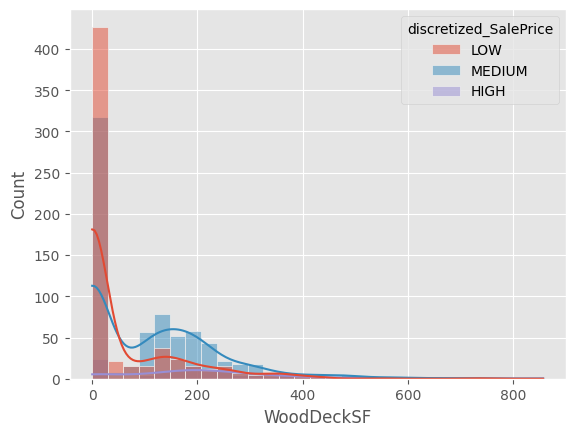

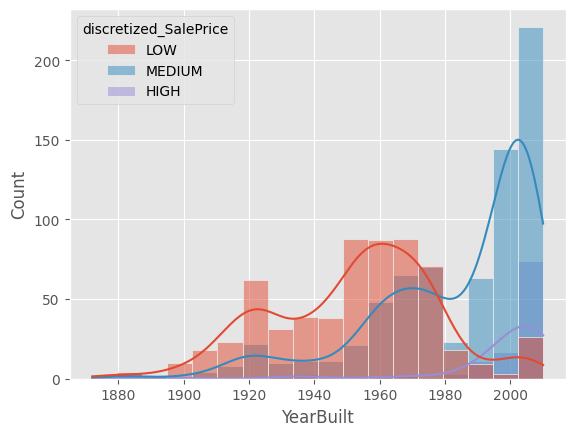

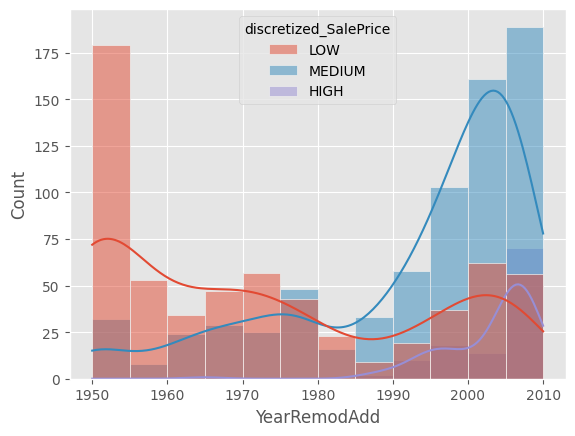

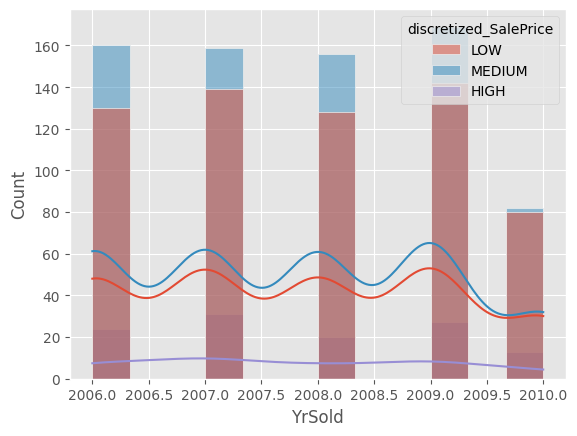

In [18]:
bins = [float('-inf'), 150001, 300000, float('inf')]
label = ['LOW','MEDIUM','HIGH']

numeric_df = house_prices[house_prices.columns.difference(categorical_attributes)]


numeric_df['discretized_SalePrice'] = pd.cut(numeric_df['SalePrice'], bins,  labels = label)
numeric_attributes = numeric_df.columns.difference(['discretized_SalePrice'])
for attribute in numeric_attributes:
   sb.histplot(x = house_prices[attribute], hue = 'discretized_SalePrice', data = numeric_df, kde=True)
   plt.show()

   

<ipython-input-19-b2457bf4e2a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df['discretized_SalePrice'] = pd.cut(categorical_df['SalePrice'], bins,  labels = label)


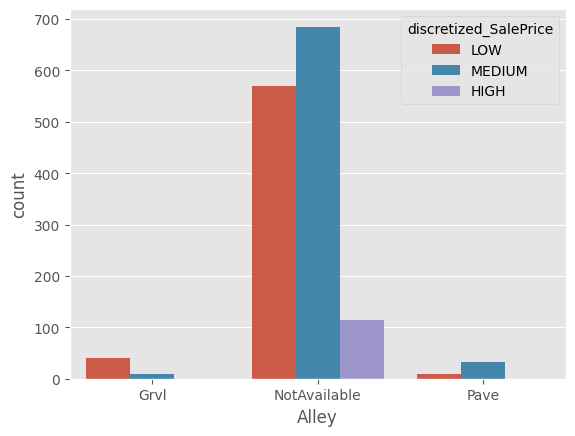

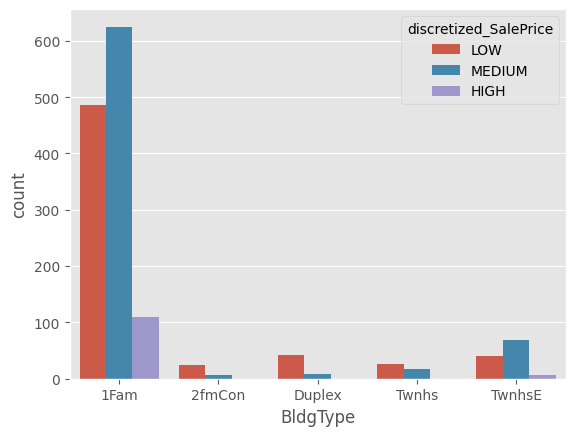

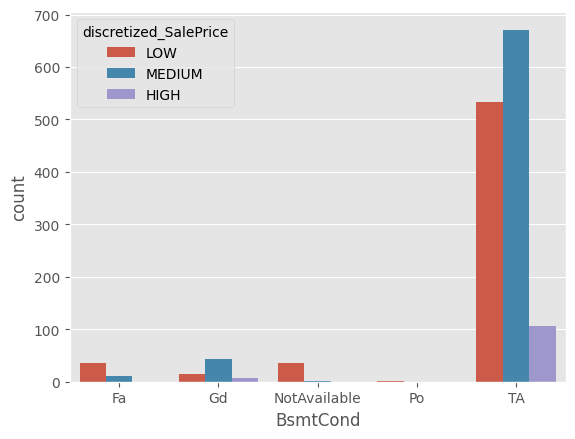

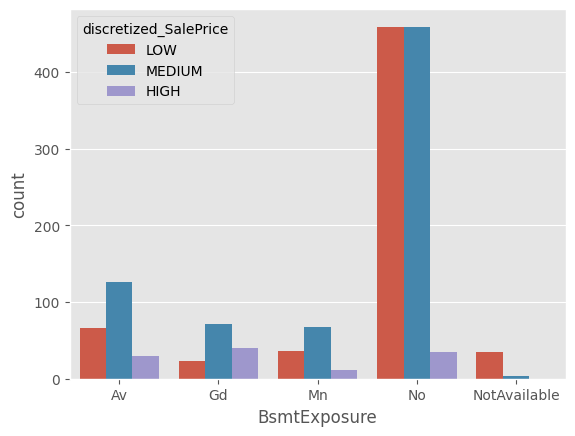

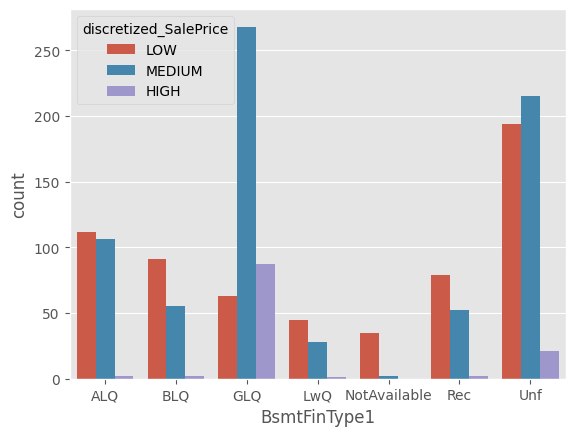

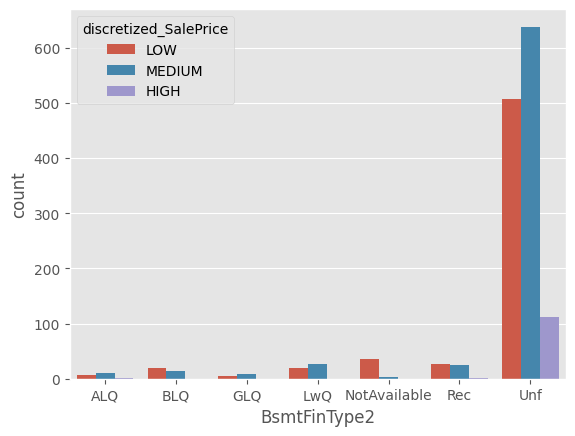

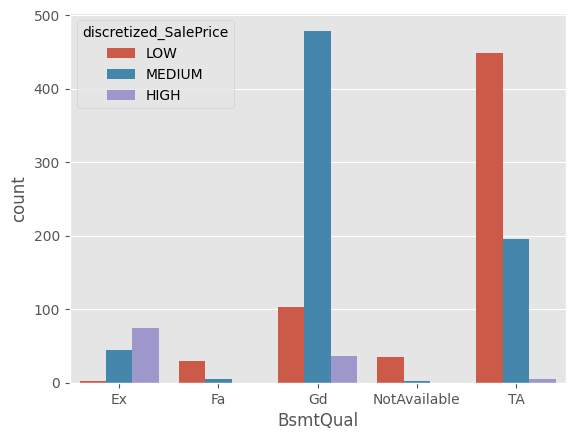

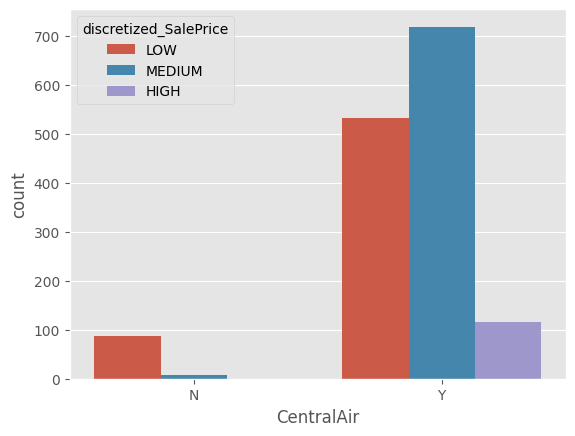

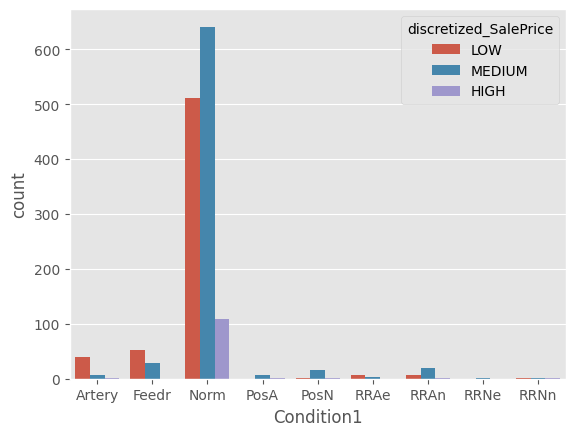

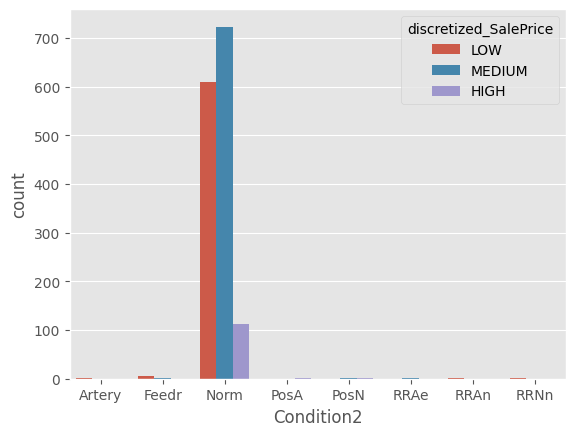

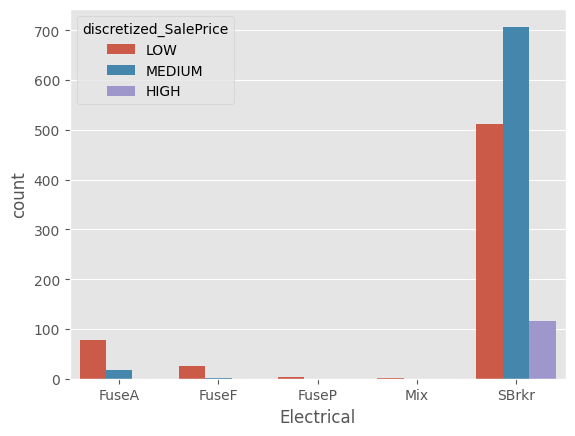

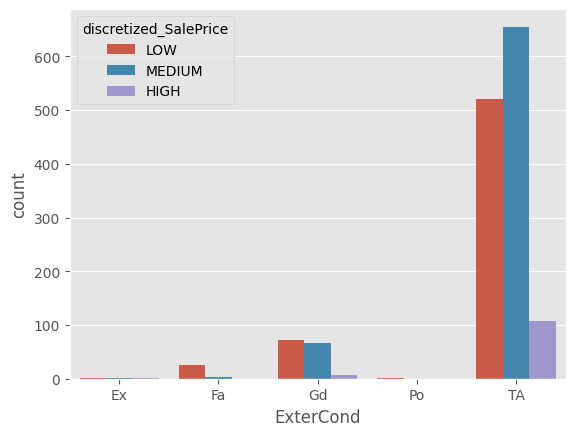

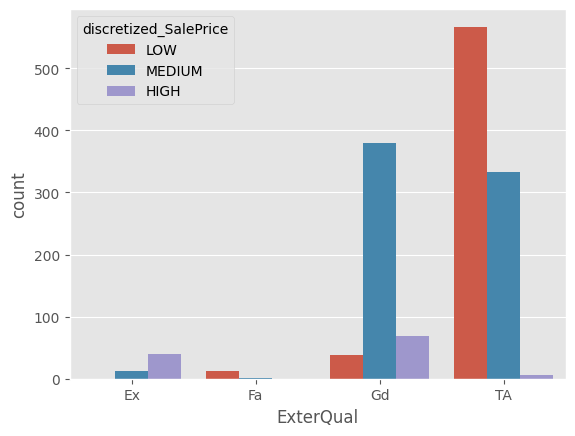

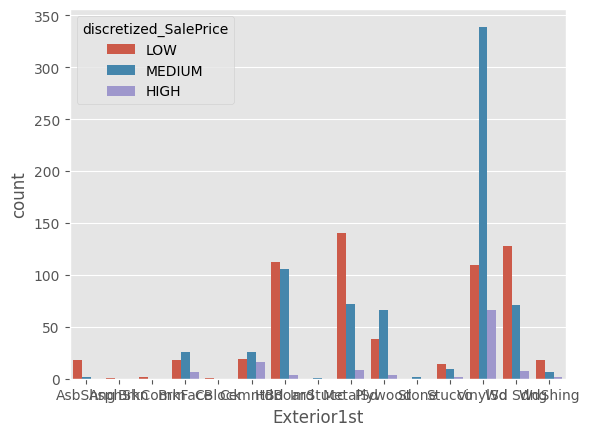

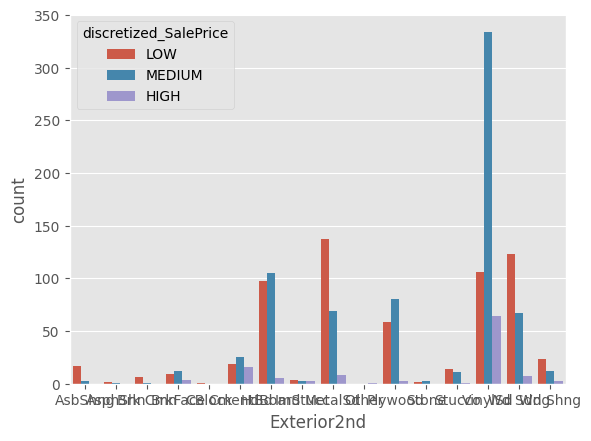

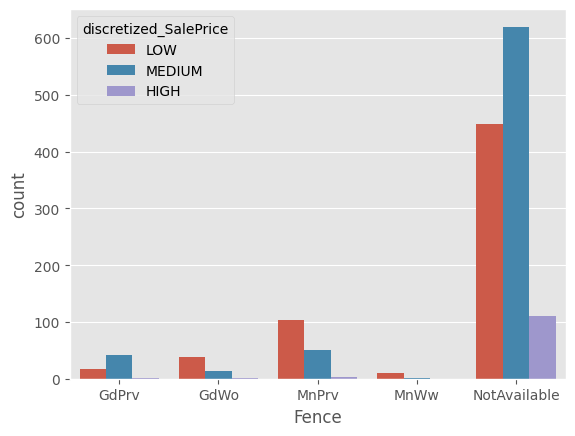

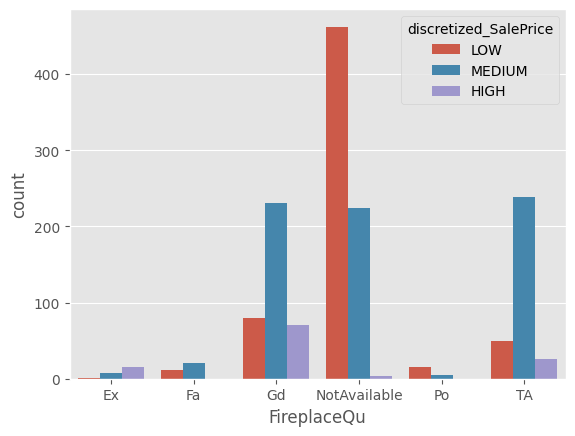

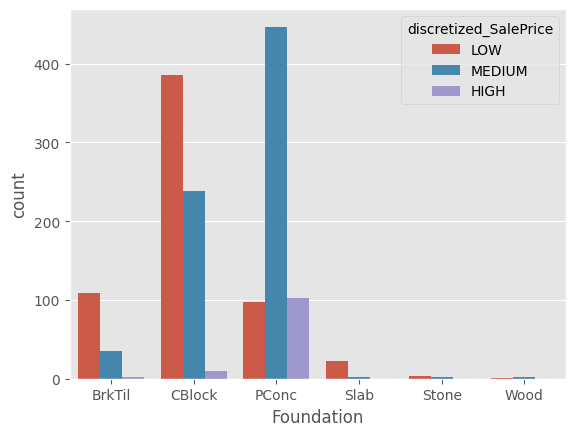

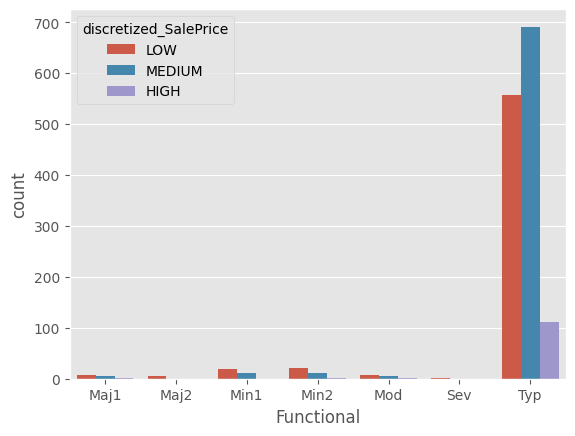

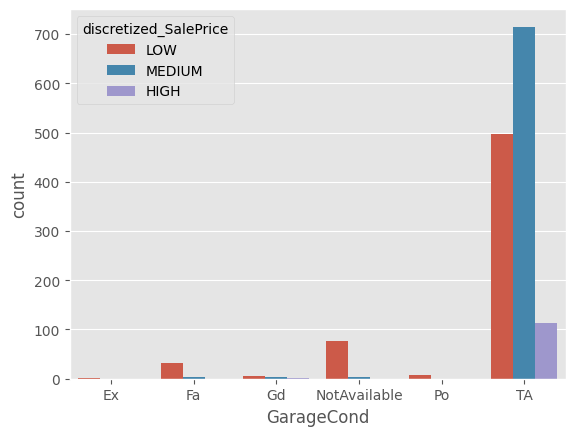

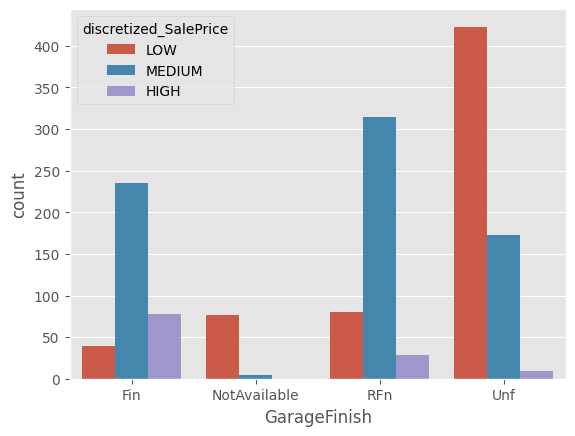

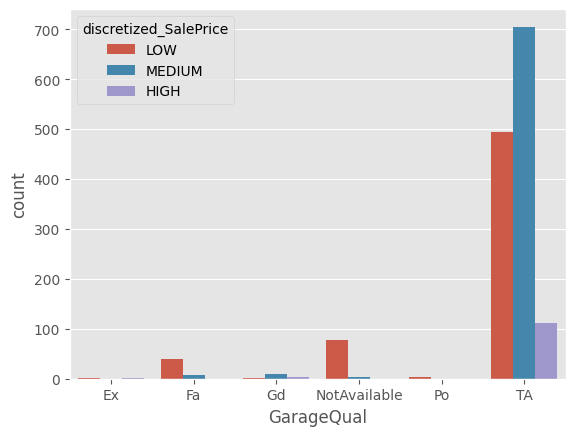

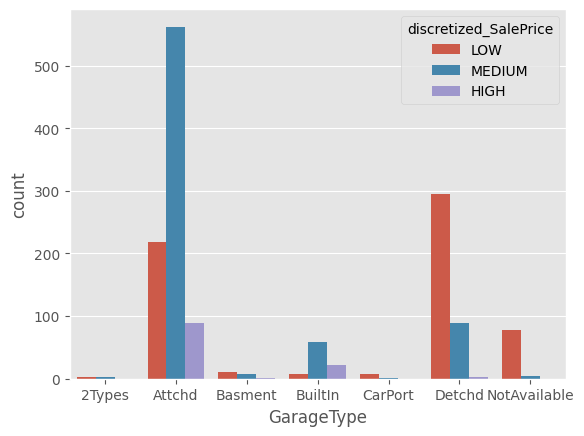

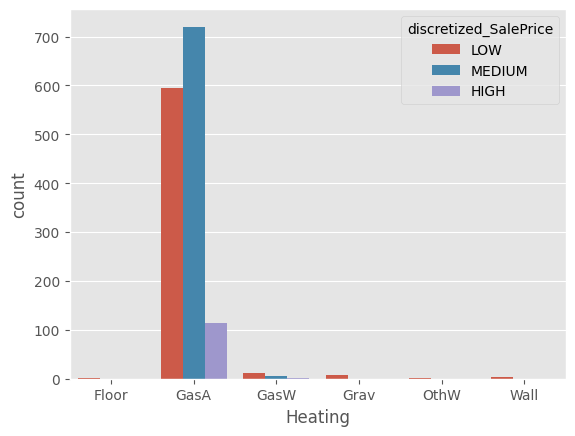

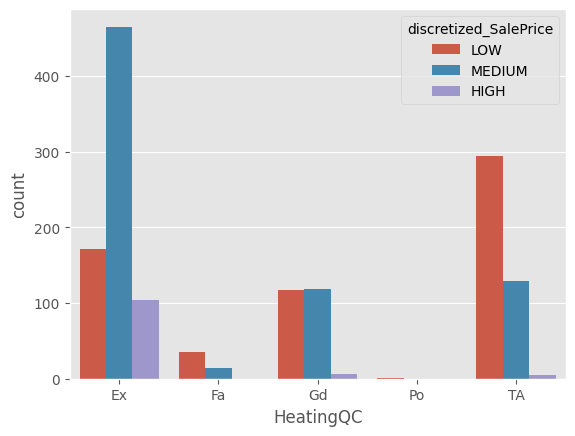

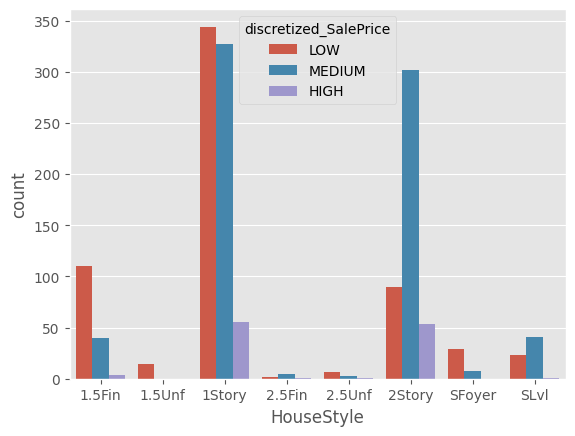

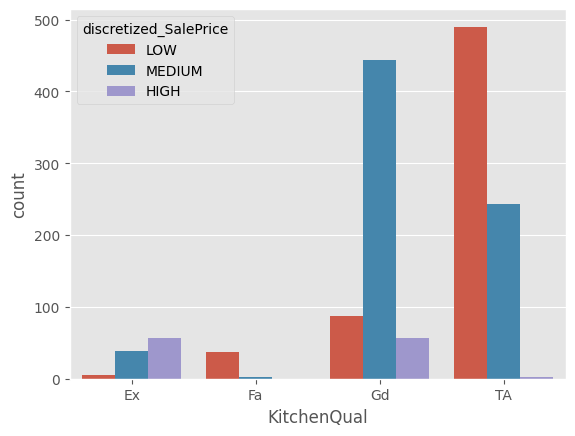

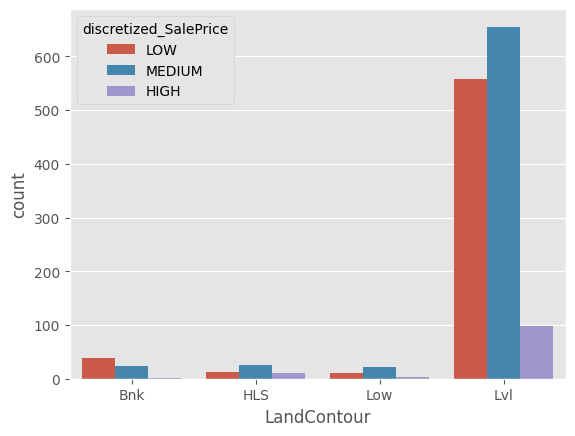

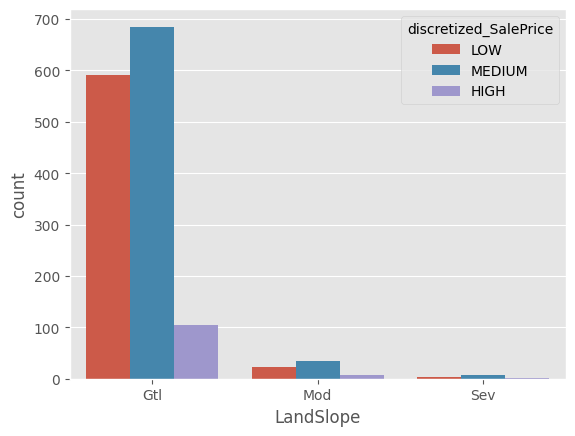

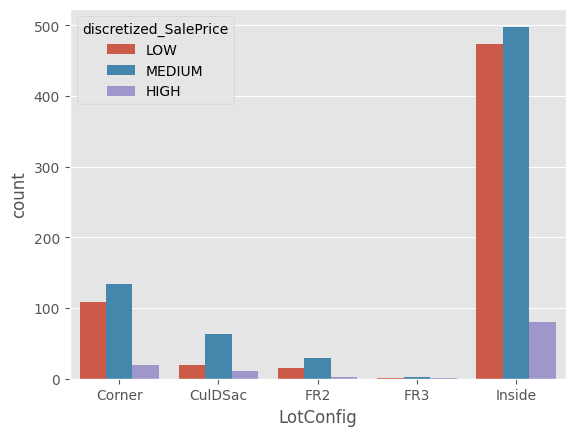

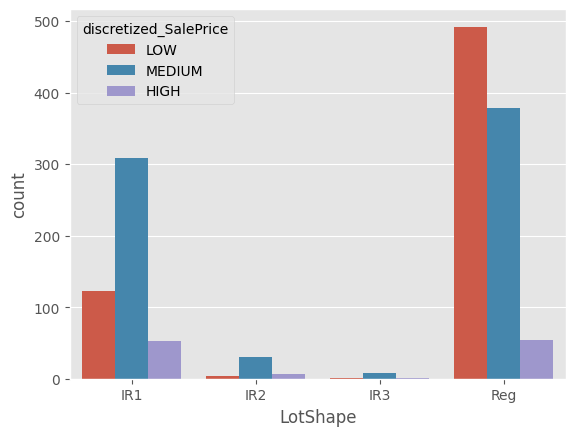

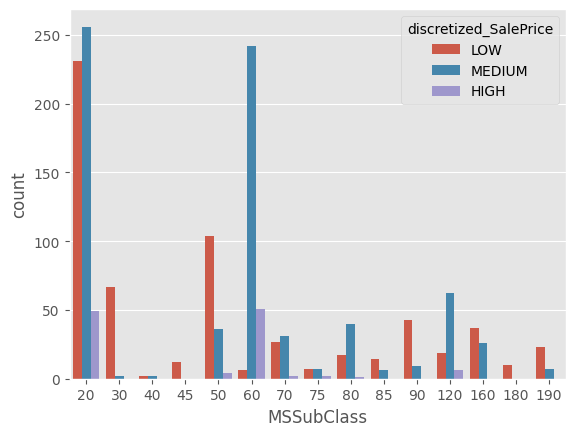

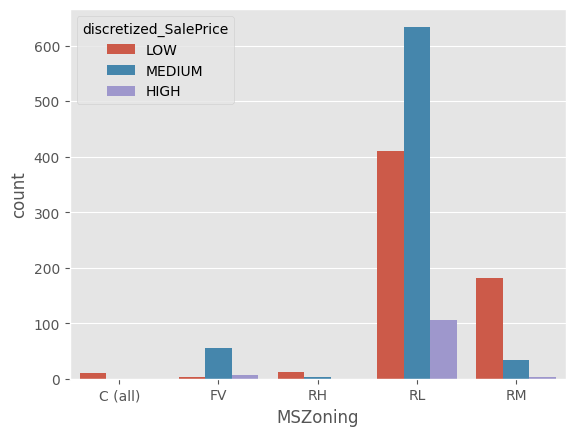

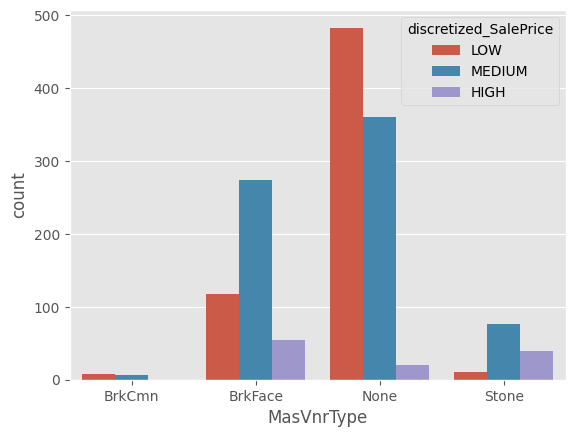

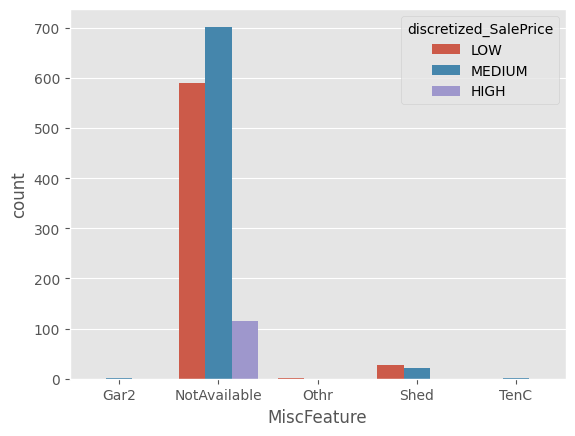

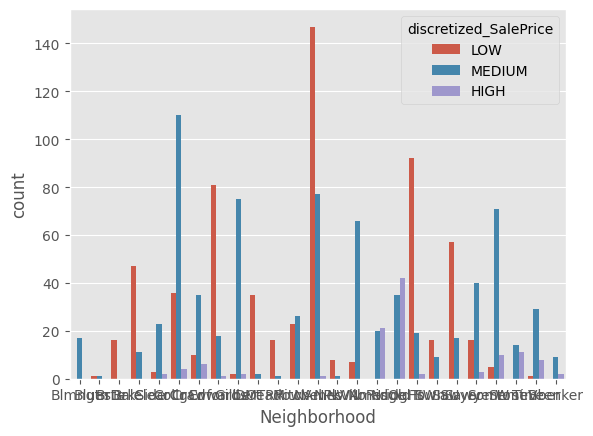

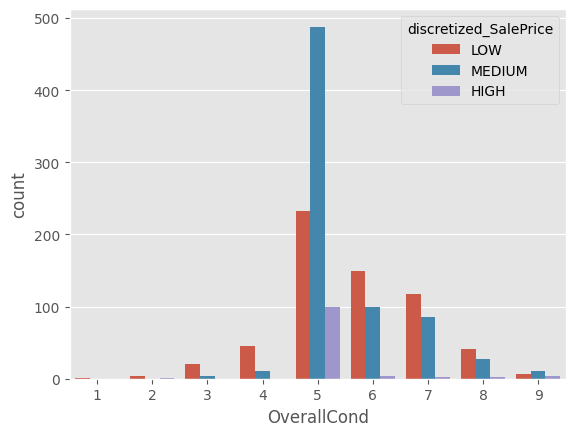

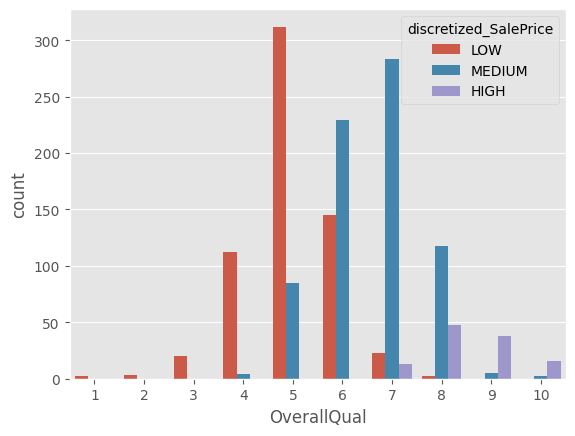

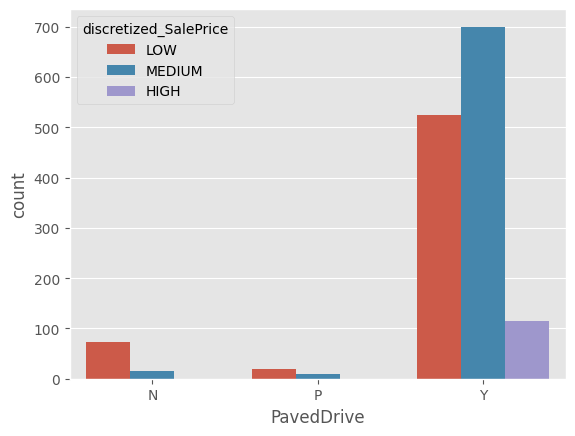

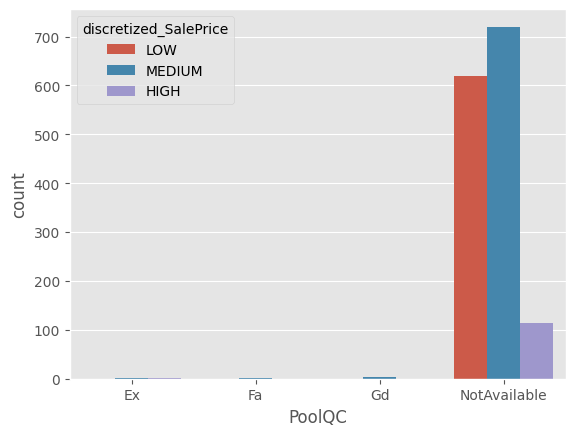

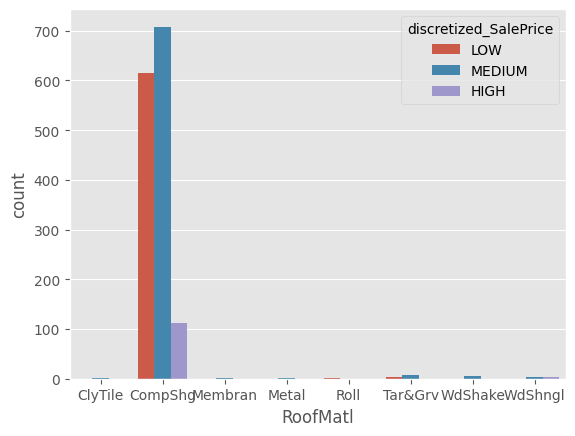

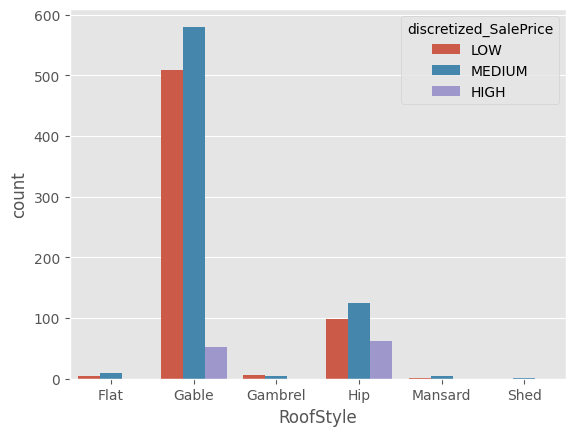

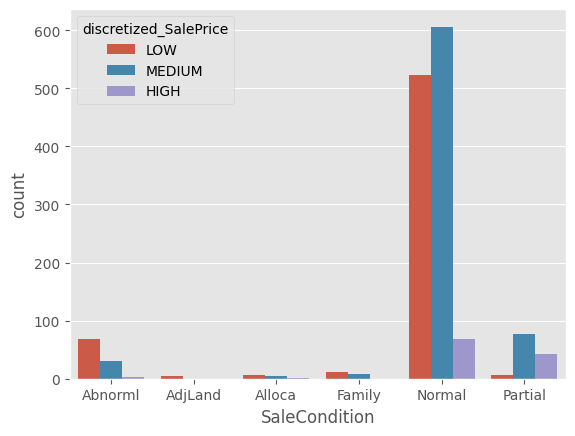

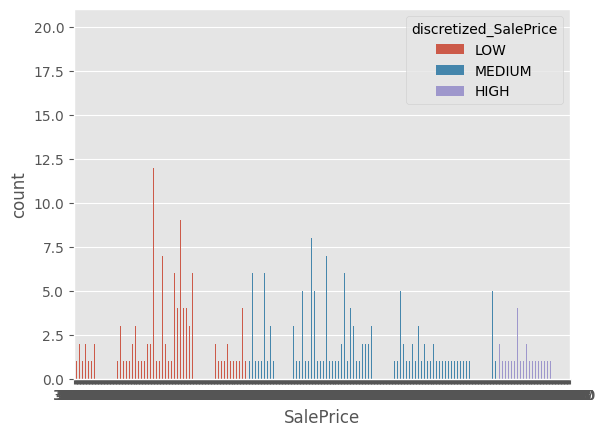

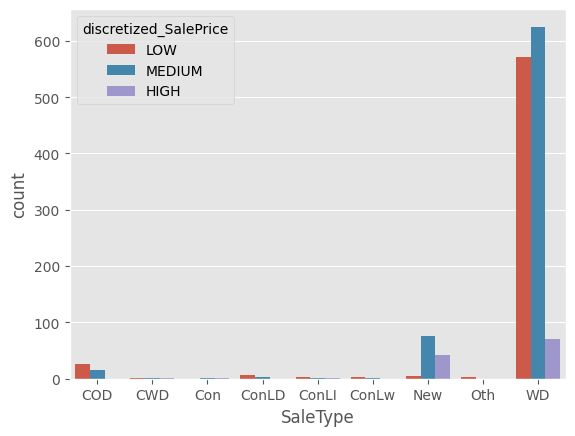

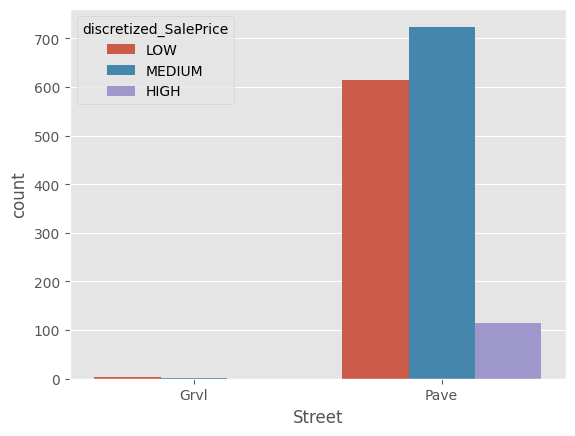

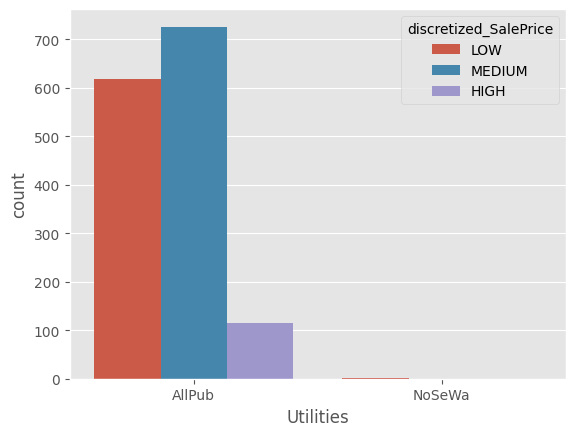

In [19]:
numeric_attributes = numeric_attributes.drop(["SalePrice"])
categorical_df = house_prices[house_prices.columns.difference(numeric_attributes)]
categorical_df['discretized_SalePrice'] = pd.cut(categorical_df['SalePrice'], bins,  labels = label)
categorical_attributes = categorical_df.columns.difference(['discretized_SalePrice'])
for attribute in categorical_attributes:
   sb.countplot(x = house_prices[attribute], hue = 'discretized_SalePrice', data = categorical_df)
   plt.show()

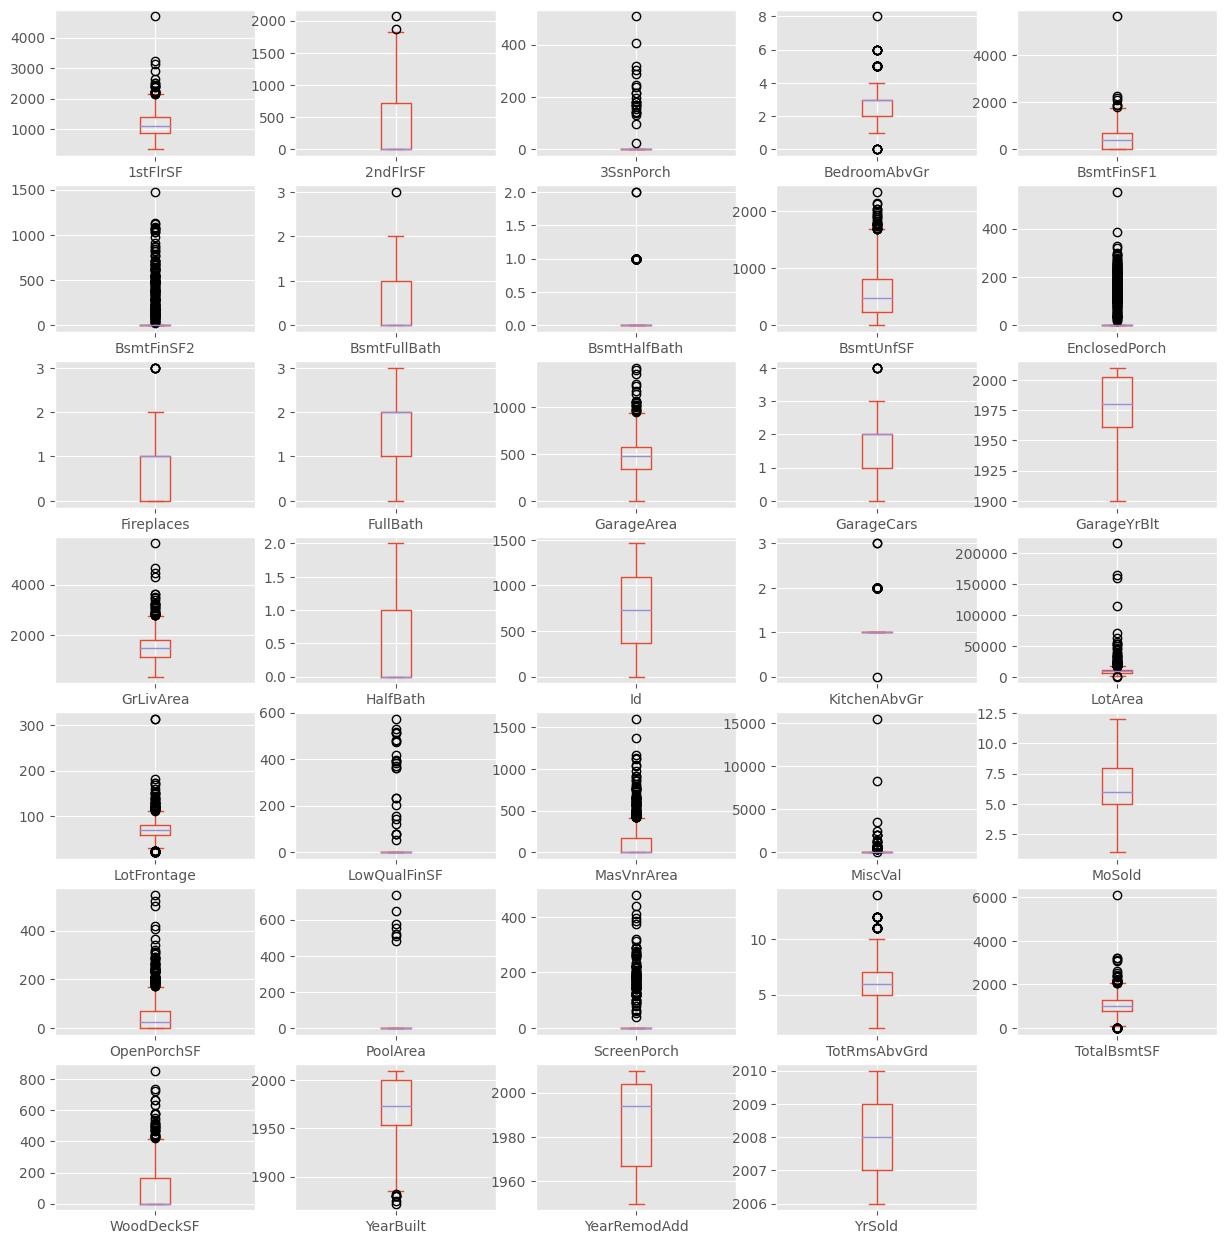

In [20]:
numeric_df = numeric_df[numeric_df.columns.difference(["SalePrice"])]
numeric_df.plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(15, 27), layout=(12,5))
plt.show()

In [21]:
#sb.pairplot(numeric_df, hue = 'discretized_SalePrice')
#plt.show()

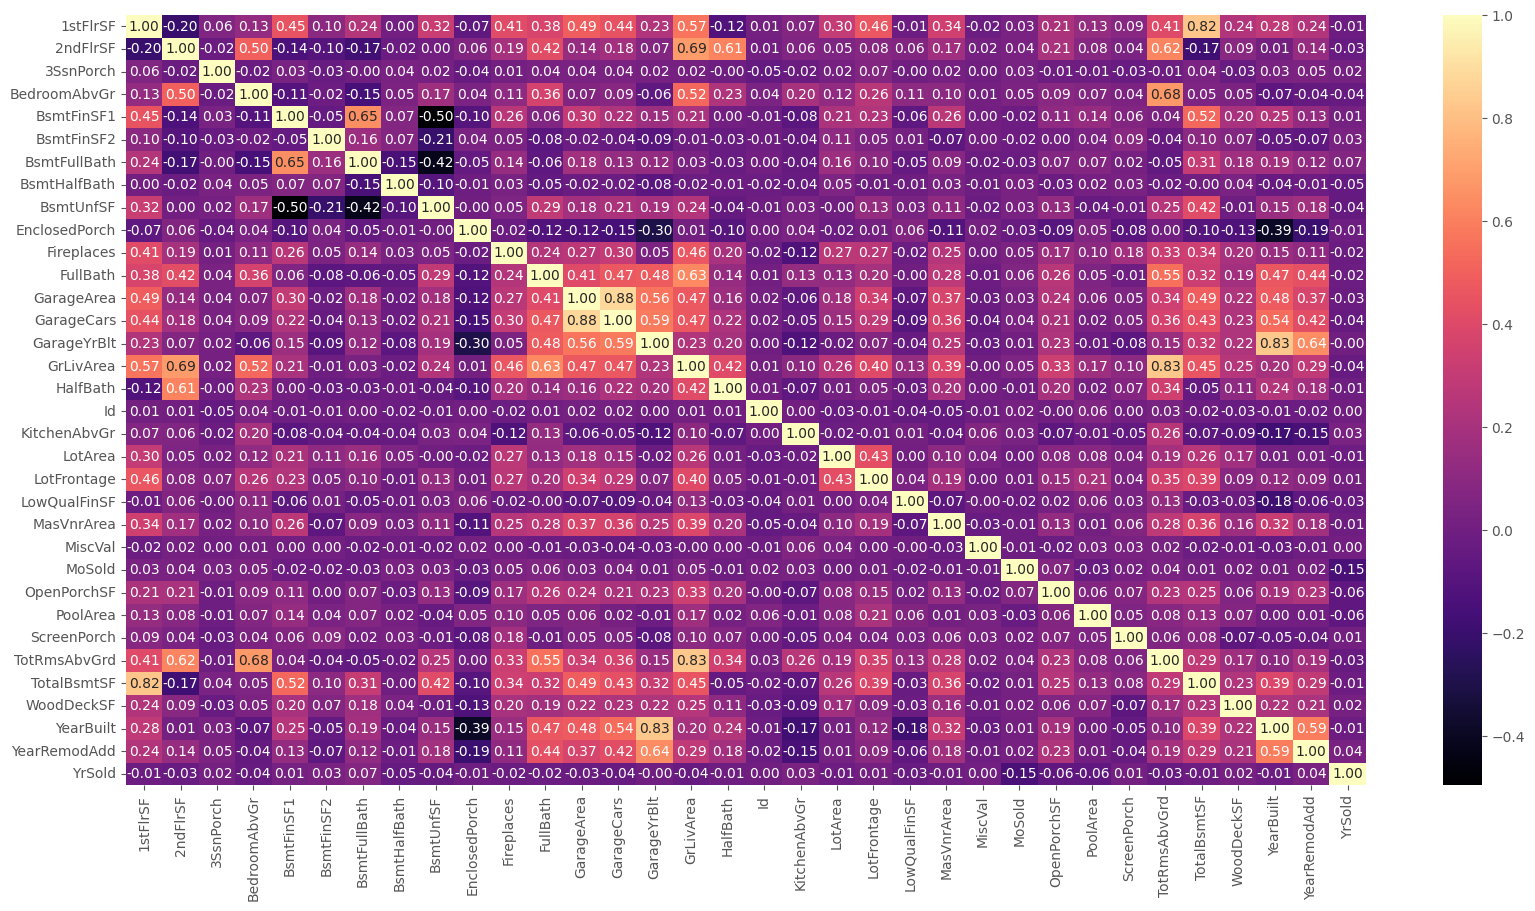

In [22]:
plt.figure(figsize=(20, 10))
numeric_df = numeric_df[numeric_df.columns.difference(["discretized_SalePrice"])]
sb.heatmap(numeric_df.corr(), annot=True, cmap='magma', fmt='.2f')
plt.show()

## Data Preparation

- LOW se SalePrice <= 150.000
- MEDIUM se 150.000 < SalePrice < 300.000
- HIGH se SalePrice >= 300.000

In [23]:
from datetime import datetime

current_year = datetime.now().year
year_to_scale = ['YrSold','YearBuilt','YearRemodAdd', 'GarageYrBlt']
for year in year_to_scale:
  res = current_year - house_prices[year]
  house_prices[year] = res.abs()

house_prices['YrSold']

0       15
1       16
2       15
3       17
4       15
        ..
1455    16
1456    13
1457    13
1458    13
1459    15
Name: YrSold, Length: 1460, dtype: int64

###Discretization

In [24]:
labels = ['FEW','AVERAGE','MANY']

house_prices['SalePrice'] = pd.cut(house_prices['SalePrice'], bins,  labels = label)
house_prices['WoodDeckSF'] = pd.cut(house_prices['WoodDeckSF'], bins = [-0.1, 80, 350, 850],  labels = labels)

house_prices['SalePrice'] = house_prices['SalePrice'].astype('category')
house_prices['WoodDeckSF'] = house_prices['WoodDeckSF'].astype('category')
house_prices.head()

Id MSSubClass MSZoning  LotFrontage  LotArea Street         Alley LotShape  \
0   1         60       RL         65.0     8450   Pave  NotAvailable      Reg   
1   2         20       RL         80.0     9600   Pave  NotAvailable      Reg   
2   3         60       RL         68.0    11250   Pave  NotAvailable      IR1   
3   4         70       RL         60.0     9550   Pave  NotAvailable      IR1   
4   5         60       RL         84.0    14260   Pave  NotAvailable      IR1   

  LandContour Utilities  ... PoolArea        PoolQC         Fence  \
0         Lvl    AllPub  ...        0  NotAvailable  NotAvailable   
1         Lvl    AllPub  ...        0  NotAvailable  NotAvailable   
2         Lvl    AllPub  ...        0  NotAvailable  NotAvailable   
3         Lvl    AllPub  ...        0  NotAvailable  NotAvailable   
4         Lvl    AllPub  ...        0  NotAvailable  NotAvailable   

    MiscFeature MiscVal MoSold YrSold SaleType SaleCondition  SalePrice  
0  NotAvailable       0      2     15       WD        Normal     MEDIUM  
1  NotAvailable       0      5     16       WD        Normal     MEDIUM  
2  NotAvailable       0      9     15       WD        Normal     MEDIUM  
3  NotAvailable       0      2     17       WD       Abnorml        LOW  
4  NotAvailable       0     12     15       WD        Normal     MEDIUM  

[5 rows x 81 columns]

#### Other information about Data-set balancing (Data Understanding)

 Entropy: 0.91


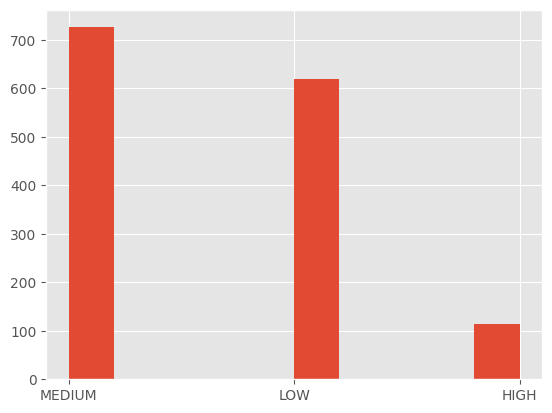

In [25]:
from scipy.stats import entropy

house_prices['SalePrice'].hist()


class_probabilities = house_prices['SalePrice'].value_counts() / house_prices.shape[0]

entropy_value = entropy(class_probabilities)
print(f" Entropy: {entropy_value:.2f}")

##### *Remove all the attributes with too high (typically IDs) or too low variability (column that exhibit the same value for all the records) and all redundat attribute*

In [26]:
to_delete = ['Id','3SsnPorch','BsmtHalfBath','PoolArea','LowQualFinSF','BsmtFinSF2','EnclosedPorch','MiscVal','ScreenPorch','Street','Alley','LandContour','Utilies','LandSlope','Condition2','RoofMatl','BsmtCond','Heating','Functional','PoolQC','MiscFeature','BsmtCond','CentrailAir','Electrical','GarageCond','GarageQual','PavedDrive']
house_prices = house_prices[house_prices.columns.difference(to_delete)]

### Handling missing values


In [27]:
house_prices['LotFrontage'] = house_prices['LotFrontage'].interpolate()

house_prices.dropna(inplace=True)

<ipython-input-27-12935da8f92c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_prices['LotFrontage'] = house_prices['LotFrontage'].interpolate()
<ipython-input-27-12935da8f92c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_prices.dropna(inplace=True)


#### Are there redundant information?


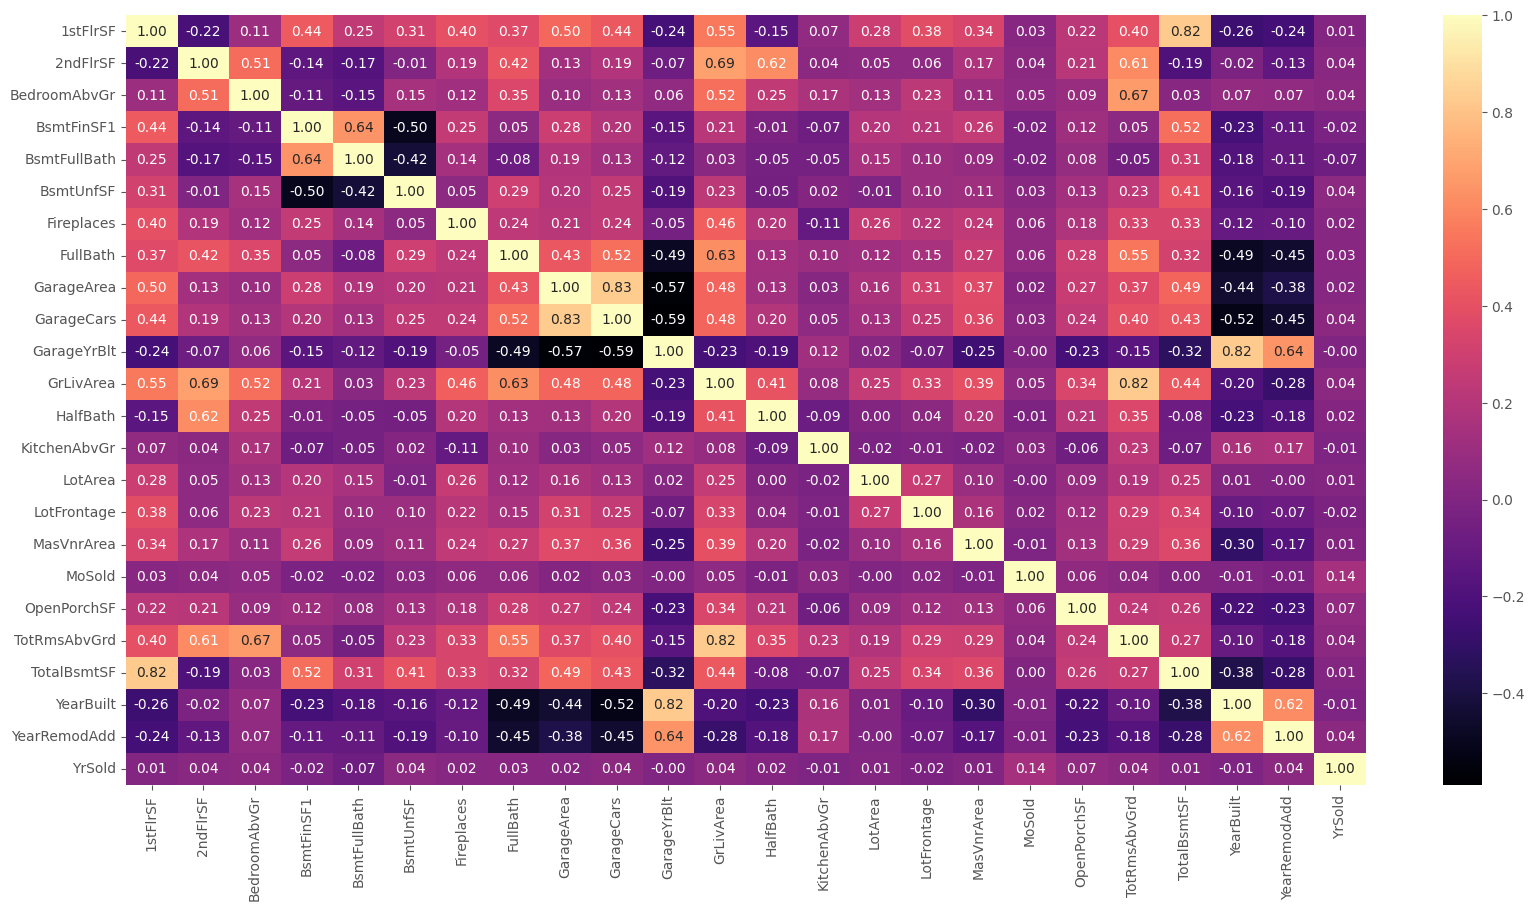

In [28]:
plt.figure(figsize=(20, 10))
sb.heatmap(house_prices.corr(numeric_only=True), annot=True, cmap='magma', fmt='.2f')
plt.show()

### Binarization

In [29]:
categorical_attributes = list(house_prices.select_dtypes(include = ['category']).columns)
categorical_attributes.remove('SalePrice')
house_prices2 = pd.get_dummies(house_prices, columns = categorical_attributes)
new_attr_list = list(house_prices2.columns)
new_attr_list.remove('SalePrice')
house_prices2 = house_prices2[new_attr_list]
house_prices2.head()


1stFlrSF  2ndFlrSF  BedroomAbvGr  BsmtFinSF1  BsmtFullBath  BsmtUnfSF  \
0       856       854             3         706             1        150   
1      1262         0             3         978             0        284   
2       920       866             3         486             1        434   
3       961       756             3         216             1        540   
4      1145      1053             4         655             1        490   

   Fireplaces  FullBath  GarageArea  GarageCars  ...  SaleType_ConLI  \
0           0         2         548           2  ...               0   
1           1         2         460           2  ...               0   
2           1         2         608           2  ...               0   
3           1         1         642           3  ...               0   
4           1         2         836           3  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  Utilities_AllPub  \
0               0             0             0            1                 1   
1               0             0             0            1                 1   
2               0             0             0            1                 1   
3               0             0             0            1                 1   
4               0             0             0            1                 1   

   Utilities_NoSeWa  WoodDeckSF_FEW  WoodDeckSF_AVERAGE  WoodDeckSF_MANY  
0                 0               1                   0                0  
1                 0               0                   1                0  
2                 0               1                   0                0  
3                 0               1                   0                0  
4                 0               0                   1                0  

[5 rows x 252 columns]

In [30]:
house_prices['SalePrice'].replace({'LOW':0,'MEDIUM':1,'HIGH':2},inplace=True)

<ipython-input-30-44cf44eafd1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_prices['SalePrice'].replace({'LOW':0,'MEDIUM':1,'HIGH':2},inplace=True)


### Normalization

##### Get all numeric attribute index to perform Normalization

In [31]:
numerical_attributes = house_prices.select_dtypes(include=np.number).columns.to_numpy()
numerical_attributes = numerical_attributes.tolist()

index_numeric = []

for col in numerical_attributes:
    index_numeric.append(house_prices.columns.get_loc(col))


## Modeling

#### Split dataset and x,y_train Sampling


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from imblearn.combine import SMOTEENN

In [33]:
x = np.array(house_prices2.values)
y = np.array(house_prices['SalePrice'].values)

seed = 42
val_size = .2

k=5
kfold = KFold(n_splits=k, shuffle=True, random_state=seed)
u=0
x_train_test_map = {}
y_train_test_map = {}

over_sampler = SMOTEENN(random_state = seed)

for train_index, test_index in kfold.split(x):
    
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=val_size, random_state=seed)

    x_train_resampled, y_train_resampled = over_sampler.fit_resample(x_train, y_train)
    x_train_test_map[u] = (x_train_resampled,x_test,x_val)
    y_train_test_map[u] = (y_train_resampled,y_test,y_val)
    u+=1

    

In [34]:
for i in range(0,k):
  print(f"*** K-FOLD {i} ***")
  print(f"x_train.shape {x_train_test_map[i][0].shape}")
  print(f"y_train.shape {y_train_test_map[i][0].shape}")
  print(f"x_test.shape {x_train_test_map[i][1].shape}")
  print("*" * (len("*** K-FOLD  ****")))




*** K-FOLD 0 ***
x_train.shape (912, 252)
y_train.shape (912,)
x_test.shape (274, 252)
****************
*** K-FOLD 1 ***
x_train.shape (849, 252)
y_train.shape (849,)
x_test.shape (274, 252)
****************
*** K-FOLD 2 ***
x_train.shape (900, 252)
y_train.shape (900,)
x_test.shape (274, 252)
****************
*** K-FOLD 3 ***
x_train.shape (884, 252)
y_train.shape (884,)
x_test.shape (274, 252)
****************
*** K-FOLD 4 ***
x_train.shape (869, 252)
y_train.shape (869,)
x_test.shape (274, 252)
****************


### Normalization (2) 

In [35]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
#UNCOMMENT IT If you want to perform the Normalization on K-Folds

#for i in range(0,k):
#  x_train = x_train_test_map[i][0]
#  x_test = x_train_test_map[i][1]
#  scaler.fit(x_train[:, index_numeric])
#  x_train[:, index_numeric] = scaler.transform(x_train[:, index_numeric])
#  x_test[:, index_numeric] = scaler.transform(x_test[:, index_numeric]) 


In [36]:
#We choose 2nd K-FOLD as the best one
x_train_tmp = pd.DataFrame(x_train_test_map[2][0], columns = house_prices2.columns)
x_train_tmp.head()

1stFlrSF  2ndFlrSF  BedroomAbvGr  BsmtFinSF1  BsmtFullBath  BsmtUnfSF  \
0    1022.0     752.0           2.0         0.0           0.0      952.0   
1     773.0       0.0           2.0       570.0           0.0      203.0   
2     980.0       0.0           3.0       400.0           0.0      100.0   
3     661.0     589.0           3.0         0.0           0.0      661.0   
4     848.0       0.0           2.0       152.0           0.0      628.0   

   Fireplaces  FullBath  GarageArea  GarageCars  ...  SaleType_ConLI  \
0         2.0       2.0       468.0         2.0  ...             0.0   
1         0.0       1.0       240.0         1.0  ...             0.0   
2         0.0       2.0       384.0         1.0  ...             0.0   
3         1.0       2.0       552.0         2.0  ...             0.0   
4         0.0       1.0       539.0         2.0  ...             0.0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  Utilities_AllPub  \
0             0.0           0.0           0.0          1.0               1.0   
1             0.0           0.0           0.0          1.0               1.0   
2             0.0           0.0           0.0          1.0               1.0   
3             0.0           0.0           0.0          1.0               1.0   
4             0.0           0.0           0.0          1.0               1.0   

   Utilities_NoSeWa  WoodDeckSF_FEW  WoodDeckSF_AVERAGE  WoodDeckSF_MANY  
0               0.0             0.0                 1.0              0.0  
1               0.0             1.0                 0.0              0.0  
2               0.0             1.0                 0.0              0.0  
3               0.0             0.0                 1.0              0.0  
4               0.0             1.0                 0.0              0.0  

[5 rows x 252 columns]

In [37]:
x_train_tmp.describe().T

count         mean         std    min         25%  \
1stFlrSF            900.0  1321.193942  453.294760  438.0  927.305396   
2ndFlrSF            900.0   467.217756  505.664417    0.0    0.000000   
BedroomAbvGr        900.0     2.891228    0.806794    0.0    2.000000   
BsmtFinSF1          900.0   602.296864  551.766111    0.0    0.000000   
BsmtFullBath        900.0     0.516288    0.500004    0.0    0.000000   
...                   ...          ...         ...    ...         ...   
Utilities_AllPub    900.0     1.000000    0.000000    1.0    1.000000   
Utilities_NoSeWa    900.0     0.000000    0.000000    0.0    0.000000   
WoodDeckSF_FEW      900.0     0.456783    0.466961    0.0    0.000000   
WoodDeckSF_AVERAGE  900.0     0.488824    0.467230    0.0    0.000000   
WoodDeckSF_MANY     900.0     0.054394    0.206346    0.0    0.000000   

                            50%          75%     max  
1stFlrSF            1241.000000  1706.903749  2633.0  
2ndFlrSF             316.204906   896.000000  2065.0  
BedroomAbvGr           3.000000     3.296386     5.0  
BsmtFinSF1           523.987365  1025.516911  2188.0  
BsmtFullBath           0.522873     1.000000     2.0  
...                         ...          ...     ...  
Utilities_AllPub       1.000000     1.000000     1.0  
Utilities_NoSeWa       0.000000     0.000000     0.0  
WoodDeckSF_FEW         0.266961     1.000000     1.0  
WoodDeckSF_AVERAGE     0.433296     1.000000     1.0  
WoodDeckSF_MANY        0.000000     0.000000     1.0  

[252 rows x 8 columns]

#### Create the models

In [38]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [39]:
models = []
#models.append(('EntropyDT', DecisionTreeClassifier(criterion='entropy', random_state=seed)))
#models.append(('GiniDT', DecisionTreeClassifier(criterion='gini', random_state=seed)))
#models.append(('GaussianNaiveBayes', GaussianNB()))
#models.append(('NeuralNetwork', MLPClassifier(hidden_layer_sizes=(50, 20, ), max_iter=500, verbose=False, random_state=seed)))
models.append(('AdaBoostClassifier', AdaBoostClassifier(n_estimators=100))) #n-estimators, #learning_rate
models.append(('RandomForestClassifier', RandomForestClassifier(n_estimators=120))) #max_depth, 
#models.append(('KNeighborsClassifier',KNeighborsClassifier(n_neighbors=5, weights='uniform')))

for i in range(0,k):
  print(f"*** K-FOLD {i} ***")
  x_train = x_train_test_map[i][0]
  y_train = y_train_test_map[i][0]
  x_test = x_train_test_map[i][1]
  y_test = y_train_test_map[i][1]
  x_val = x_train_test_map[i][2]
  y_val = y_train_test_map[i][2]

  for name, model in models:

    print(f"*** {name} ***")
    
    model.fit(x_train,y_train)
   
    y_val_pred = model.predict(x_val)

    print('Classification metrics: ')
    print(classification_report(y_val, y_val_pred))
    
    predictions = model.predict(x_test)
    print(f'Accuracy: {accuracy_score(y_test, predictions):.2f}')

*** K-FOLD 0 ***
*** AdaBoostClassifier ***
Classification metrics: 
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        97
           1       0.73      0.80      0.77       106
           2       0.62      0.29      0.40        17

    accuracy                           0.76       220
   macro avg       0.72      0.63      0.66       220
weighted avg       0.76      0.76      0.76       220

Accuracy: 0.74
*** RandomForestClassifier ***
Classification metrics: 
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        97
           1       0.88      0.83      0.85       106
           2       0.71      0.88      0.79        17

    accuracy                           0.86       220
   macro avg       0.82      0.87      0.84       220
weighted avg       0.87      0.86      0.86       220

Accuracy: 0.84
*** K-FOLD 1 ***
*** AdaBoostClassifier ***
Classification metrics: 
              

## Evaluation

#### Do predictions on test set

In [40]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [41]:
def make_confusion_matrix(cf, categories='auto', cbar=True, cmap='Blues', title=None):
    group_counts = [f'{value}\n' for value in cf.flatten()]

    box_labels = [f'{v1}'.strip() for v1 in group_counts]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    sb.heatmap(cf, annot=box_labels, fmt='', cmap=cmap, cbar=cbar, xticklabels=categories, yticklabels=categories)

    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    if title:
        plt.title(title)

#### Comparing the metric we decide to keep in consideration 2nd K-Fold

In [42]:
x_train = x_train_test_map[2][0]
y_train = y_train_test_map[2][0]
x_test = x_train_test_map[2][1]
y_test = y_train_test_map[2][1]
categories = ['LOW','MEDIUM','HIGH']

#### Entropy DecisionTreeClassifier

Accuracy: 0.84


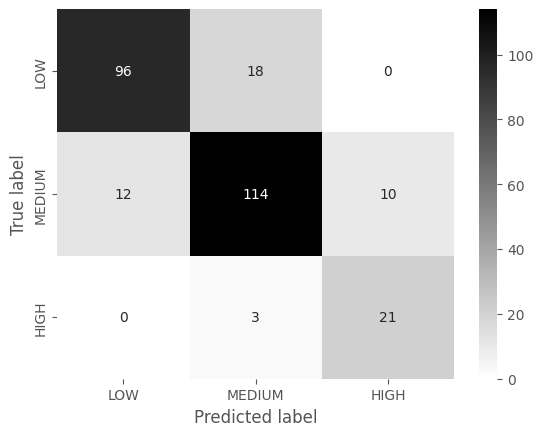

In [43]:
model = DecisionTreeClassifier(criterion='entropy', random_state=seed) 

model.fit(x_train, y_train)
predictions = model.predict(x_test)

print(f'Accuracy: {accuracy_score(y_test, predictions):.2f}')
make_confusion_matrix(confusion_matrix(y_test, predictions), categories=categories, cmap='binary')

#### Gini DecisionTreeClassifier

Accuracy: 0.81


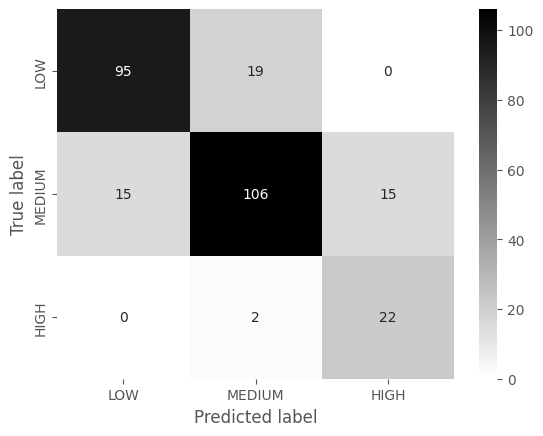

In [44]:
model = DecisionTreeClassifier(criterion='gini', random_state=seed)

model.fit(x_train, y_train)
predictions = model.predict(x_test)


print(f'Accuracy: {accuracy_score(y_test, predictions):.2f}')
make_confusion_matrix(confusion_matrix(y_test, predictions), categories=categories, cmap='binary')

#### GaussianNB

Accuracy: 0.82


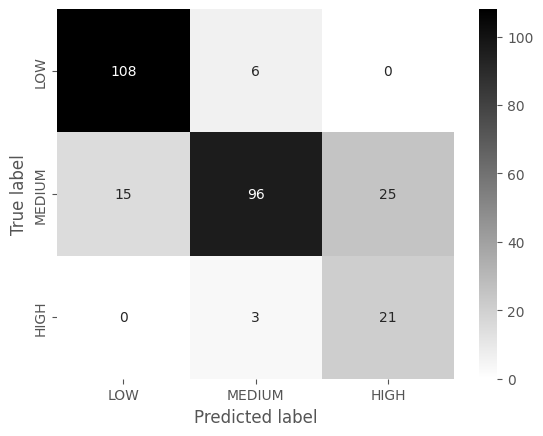

In [45]:
model = GaussianNB()

model.fit(x_train, y_train)
predictions = model.predict(x_test)


print(f'Accuracy: {accuracy_score(y_test, predictions):.2f}')
make_confusion_matrix(confusion_matrix(y_test, predictions), categories=categories, cmap='binary')

#### Multi-Layer-Perceptron Classifier

Iteration 1, loss = 19.16112895
Iteration 2, loss = 24.75386998
Iteration 3, loss = 22.26347955
Iteration 4, loss = 18.26304303
Iteration 5, loss = 17.70609495
Iteration 6, loss = 14.80088550
Iteration 7, loss = 13.29515708
Iteration 8, loss = 10.68800596
Iteration 9, loss = 9.15710631
Iteration 10, loss = 7.48452504
Iteration 11, loss = 5.67493230
Iteration 12, loss = 4.46465537
Iteration 13, loss = 4.05844701
Iteration 14, loss = 3.60648721
Iteration 15, loss = 3.09077234
Iteration 16, loss = 2.80244686
Iteration 17, loss = 2.64878252
Iteration 18, loss = 2.73690283
Iteration 19, loss = 2.62686668
Iteration 20, loss = 2.59324596
Iteration 21, loss = 2.24623446
Iteration 22, loss = 2.18403425
Iteration 23, loss = 2.05921645
Iteration 24, loss = 1.98534777
Iteration 25, loss = 2.21275602
Iteration 26, loss = 2.03211669
Iteration 27, loss = 1.94358718
Iteration 28, loss = 1.83090021
Iteration 29, loss = 1.66206530
Iteration 30, loss = 1.70056520
Iteration 31, loss = 1.80627256
Iteration

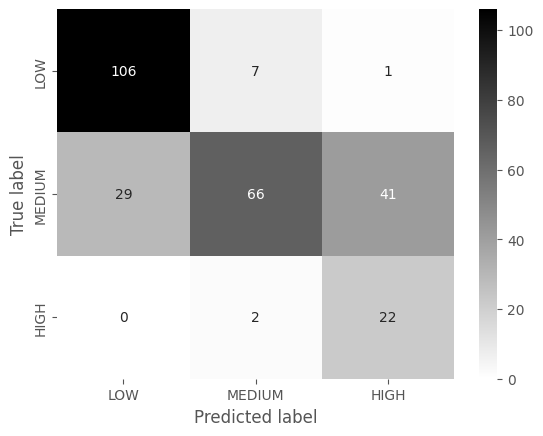

In [46]:
model = MLPClassifier(hidden_layer_sizes=(50, 20, ), max_iter=500, verbose=True, random_state=seed) 

model.fit(x_train, y_train)
predictions = model.predict(x_test)


print(f'Accuracy: {accuracy_score(y_test, predictions):.2f}')
make_confusion_matrix(confusion_matrix(y_test, predictions), categories=categories, cmap='binary')

#### AdaBoostClassifier

Accuracy: 0.85


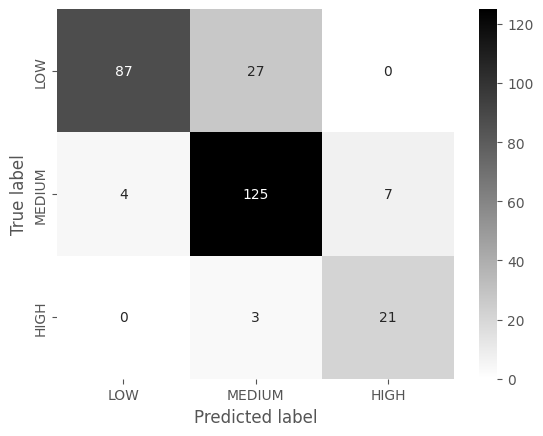

In [47]:
model = AdaBoostClassifier(n_estimators=120) 

model.fit(x_train, y_train)
predictions = model.predict(x_test)


print(f'Accuracy: {accuracy_score(y_test, predictions):.2f}')
make_confusion_matrix(confusion_matrix(y_test, predictions), categories=categories, cmap='binary')

#### RandomForestClassifier

Accuracy: 0.90


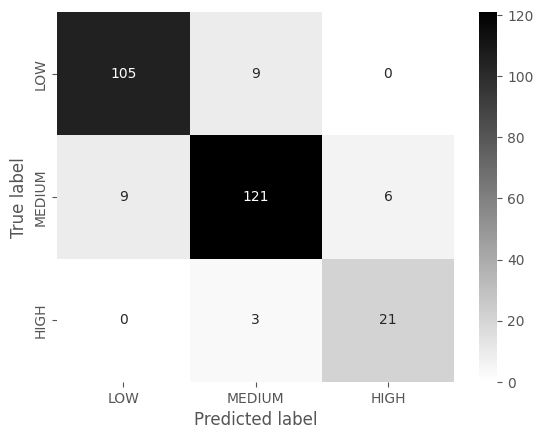

In [48]:
model = RandomForestClassifier(n_estimators=120) #max_depth

model.fit(x_train, y_train)
predictions = model.predict(x_test)

print(f'Accuracy: {accuracy_score(y_test, predictions):.2f}')
make_confusion_matrix(confusion_matrix(y_test, predictions), categories=categories, cmap='binary')

#### KNeighborsClassifier

Accuracy: 0.70


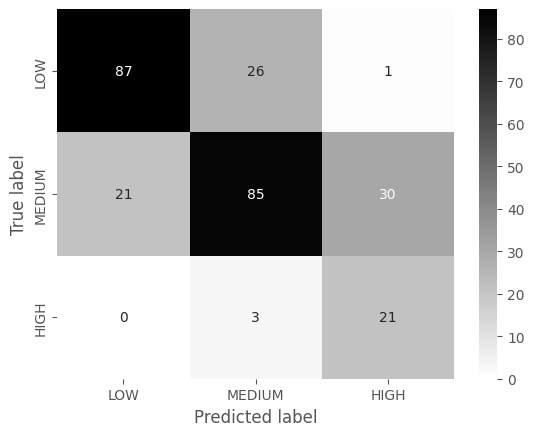

In [49]:
model = KNeighborsClassifier(n_neighbors=5, weights='uniform')

model.fit(x_train, y_train)
predictions = model.predict(x_test)

print(f'Accuracy: {accuracy_score(y_test, predictions):.2f}')
make_confusion_matrix(confusion_matrix(y_test, predictions), categories=categories, cmap='binary')

In [50]:
from sklearn.metrics import roc_curve, auc

one_hot_encoding = np.array(pd.get_dummies(y_train_test_map[2][1], columns = ['SalePrice']))

probs = []

for _, model in models:
    model.fit(x_train_test_map[2][0],y_train_test_map[2][0])
    probs.append(model.predict_proba(x_train_test_map[2][1]))

##ROC Curve

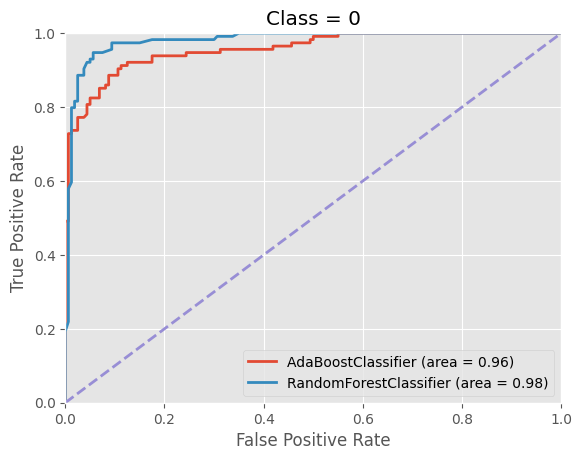

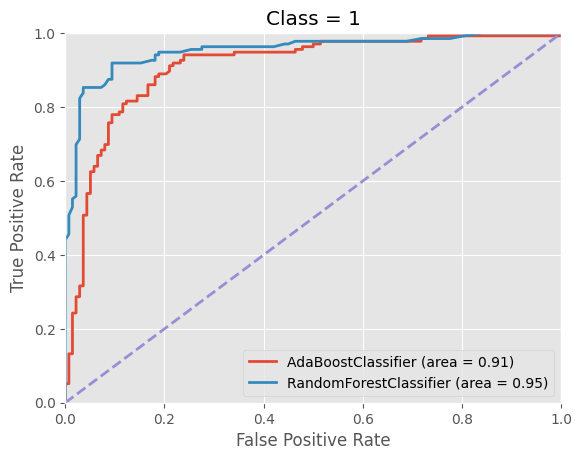

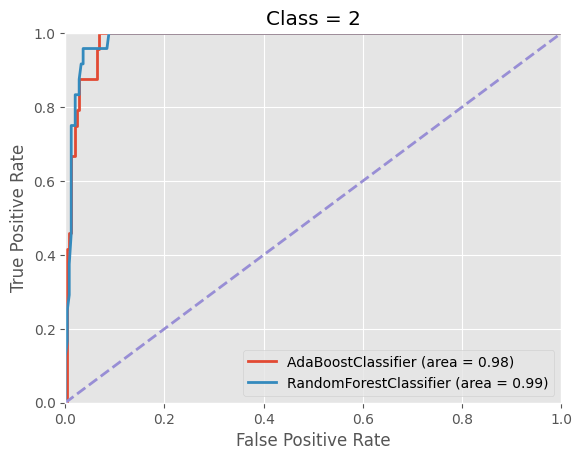

In [51]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y))):
    plt.figure()
    m = 0

    for name, _ in models:
        fpr[i], tpr[i], _ = roc_curve(one_hot_encoding[:, i], probs[m][:, i])
        
        roc_auc[i] = auc(fpr[i], tpr[i])

        plt.plot(fpr[i], tpr[i], lw=2, label=name + f' (area = {roc_auc[i]:.2f})')
        m += 1

    plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class = ' + str(np.unique(y)[i]))
    plt.legend(loc='lower right')

    plt.show()

[0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0
 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 0 0 0
 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0
 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1
 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0
 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1]
[2.08702240e-01 2.42127125e-01 7.59560038e-01 7.21273766e-03
 8.82341076e-04 3.88223325e-01 4.03358903e-01 7.39679146e-01
 4.49397054e-01 3.55087926e-02 8.12436361e-01 3.32486100e-01
 1.90496433e-03 5.63781922e-01 2.03959770e-04 2.30652181e-01
 7.88417747e-01 8.41210864e-01 7.59872785e-01 1.60363631e-01
 7.10387500e-01 3.24157923e-01 2.71420593e-01 7.75872597e-01
 1.15636678e-01 8.31627141e-01 2.50233987e-01 5.50357790e-01
 5.22840074e-01 

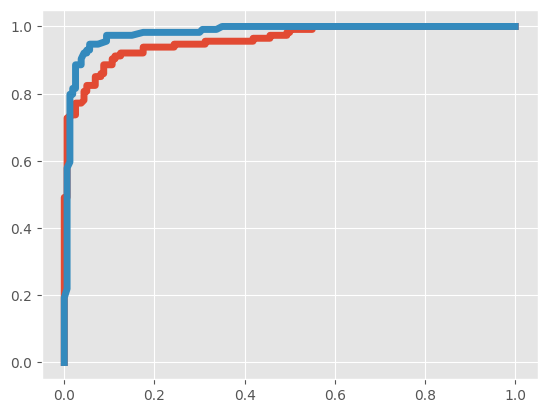

In [56]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y))):
    plt.figure()
    m = 0

    for name, _ in models:
        fpr[i], tpr[i], _ = roc_curve(one_hot_encoding[:, i], probs[m][:, i])
        
        print(one_hot_encoding[:, i])
        print(probs[m][:, i])
        
        roc_auc[i] = auc(fpr[i], tpr[i])

        plt.plot(fpr[i], tpr[i], lw=5, label=name + f' (area = {roc_auc[i]:.2f})')
        m += 1
        

    break

In [53]:
one_hot_encoding[:, 0]

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1], dtype=uint8)